# doped Example Workbook

In [2]:
from doped import vasp_input
from doped.pycdt.core.defectsmaker import ChargedDefectsStructures
from pymatgen.core.structure import Structure

In [5]:
# Load our relaxed bulk cell (CdTe in conventional cubic structure), and make our defect supercell:
relaxed_conventional_cell = Structure.from_file("Examples/relaxed_conventional_POSCAR")

# make a 2x2x2 supercell expansion of our cubic conentional cell:
bulk_supercell = relaxed_conventional_cell.copy()
bulk_supercell.make_supercell(2) 
bulk_supercell.to(fmt="poscar", filename="Bulk_Supercell_POSCAR") # calculate this with the same INCAR, KPOINTS and POTCAR settings as your defects!

You should run a singlepoint calculation with this bulk supercell **using the same `INCAR`, `KPOINTS` and `POTCAR` settings** you use for your final defect calculations below, to then compute the formation energies and charge corrections. A quick way to do this is to take the `INCAR` (removing the `NELECT` and `NUPDOWN` lines), `KPOINTS` and `POTCAR` generated for one of your defect calculations below, and running the calculation with these settings, with the `Bulk_Supercell_POSCAR`

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # for clean example notebook

In [7]:
def_structs = ChargedDefectsStructures(
    bulk_supercell,
    cellmax=bulk_supercell.num_sites,
    substitutions={"Te": ["Se"]},  # As a dictionary
    antisites_flag=True,
    include_interstitials=True,
)

Setting up vacancies
Setting up antisites
Searching for Voronoi interstitial sites (this can take a while)

Number of jobs created:
    bulk = 1
    vacancies:
        vac_1_Cd = 5 with site multiplicity 32
        vac_2_Te = 5 with site multiplicity 32
    substitutions:
        sub_2_Se_on_Te = 7 with site multiplicity 32
        as_1_Cd_on_Te = 7 with site multiplicity 32
        as_1_Te_on_Cd = 7 with site multiplicity 32
    interstitials:
        Int_Cd_1 = 3 with site multiplicity 32
        Int_Cd_2 = 3 with site multiplicity 128
        Int_Cd_3 = 3 with site multiplicity 1
        Int_Te_1 = 9 with site multiplicity 1
        Int_Te_2 = 9 with site multiplicity 128
        Int_Te_3 = 9 with site multiplicity 32
Total (non dielectric) jobs created = 68



In [4]:
# Expand the output of this cell to see what the ChargedDefectsStructures output
# dictionary looks like 
print(def_structs.defects)

{'bulk': {'name': 'bulk', 'supercell': {'size': [1, 1, 1], 'structure': Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7

In [8]:
vacancies_only = {"vacancies": [val for val in def_structs.defects["vacancies"]]}
substitutions_only = {
    "substitutions": [val for val in def_structs.defects["substitutions"]]
}
interstitials_only = {
    "interstitials": [val for val in def_structs.defects["interstitials"]]
}

In [9]:
# Look at the PyCDT-proposed likely defect charge states, and think if you want to change it
for val in substitutions_only["substitutions"]:
    print(f"Defect: {val['name']}")
    print(f"PyCDT-proposed defect charge states: {val['charges']}")
    print("Happy with this? If not look at the next code block \n")

Defect: sub_2_Se_on_Te
PyCDT-proposed defect charge states: [-1, 0, 1, 2, 3, 4, 5]
Happy with this? If not look at the next code block 

Defect: as_1_Cd_on_Te
PyCDT-proposed defect charge states: [-2, -1, 0, 1, 2, 3, 4]
Happy with this? If not look at the next code block 

Defect: as_1_Te_on_Cd
PyCDT-proposed defect charge states: [-2, -1, 0, 1, 2, 3, 4]
Happy with this? If not look at the next code block 



In [10]:
# Can manually set the charge states you want to investigate, if the auto-generated ones from PyCDT
# (using observed oxidatation states) aren't the exact range you want to calculate
## This is something which may be further developed in the future
for val in substitutions_only["substitutions"]:
    if val["name"] == "as_1_Cd_on_Te":
        val["charges"] = [0, 1, 2]
    elif val["name"] == "as_1_Te_on_Cd":
        val["charges"] = [-2, -1, 0]
for val in interstitials_only["interstitials"]:
    if val["site_specie"] == "Te":
        val["charges"] = [-2, -1, 0]
for val in vacancies_only["vacancies"]:
    if val["site_specie"] == "Cd":
        val["charges"] = [-2, -1, 0]
    elif val["site_specie"] == "Te":
        val["charges"] = [0, 1, 2]

In [11]:
# Look at the new range of defect charge states
for val in substitutions_only["substitutions"]:
    print(f"Defect: {val['name']}")
    print(f"New defect charge states: {val['charges']}\n")

Defect: sub_2_Se_on_Te
New defect charge states: [-1, 0, 1, 2, 3, 4, 5]

Defect: as_1_Cd_on_Te
New defect charge states: [0, 1, 2]

Defect: as_1_Te_on_Cd
New defect charge states: [-2, -1, 0]



### Determining the ground-state defect structures

**At this point, it's recommended that you use the [ShakeNBreak](https://shakenbreak.readthedocs.io/en/latest/) approach** to quickly identify the groundstate structures of your defects, before continuing on with the formation energy calculation workflow below. As detailed in the [theory paper](https://arxiv.org/abs/2207.09862), skipping this step can result in drastically incorrect formation energies, transition levels, carrier capture (basically any property associated with defects). This approach is followed below, with a more in-depth explanation and tutorial given on the [ShakeNBreak](https://shakenbreak.readthedocs.io/en/latest/) website.

In [14]:
vasp_input.prepare_vasp_defect_dict?

Signature:
vasp_input.prepare_vasp_defect_dict(
    defects: dict,
    write_files: bool = False,
    sub_folders: list = None,
) -> dict
Docstring:
Creates a transformation dictionary so we can tell PyCDT the
initial defect site for post-processing analysis, in case it
can't do it itself later on (common if multiple relaxations occur)
        Args:
            defects (dict):
                Dictionary of defect-object-dictionaries from PyCDT's
                ChargedDefectsStructures class (see example notebook)
            write_files (bool):
                If True, write transformation.json files to
                {defect_folder}/ or {defect_folder}/{*sub_folders}/
                if sub_folders specified
                (default: False)
            sub_folders (list):
                List of sub-folders (in the defect folder) to write
                the transformation.json file to
                (default: None)
File:      ~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/B

In [15]:
# Make the transformation dictionary so we can tell PyCDT the initial defect site (as a failsafe for easy
# post-processing analysis later on, in case the pymatgen functions can't automatically 'detect'
# the defect site in our final relaxed structure)
defect_subfolders_dict_transf = vasp_input.prepare_vasp_defect_dict(
    vacancies_only, write_files=True
)
# Setting write_files=True means that this will create folders for each defect in the current directory
# with the defect transformation.json file (will possibly be useful later on for easy post-processing)

In [16]:
defect_subfolders_dict_transf = vasp_input.prepare_vasp_defect_dict(
    vacancies_only, write_files=True, sub_folders=["vasp_gam", "vasp_std", "vasp_ncl"]
)
# Setting write_files=True and providing a list of sub_folders means that this will create subfolders in
# each defect folder (in the current working directory) with the defect transformation.json file
# (useful to have this file in each individual calculation folder - can perform post-processing analysis at
# different stages of the calculations (i.e. if you want to analyse the vasp_gam relaxation results before
# running the vasp_std relaxation etc.)

In [55]:
defect_subfolders_dict_transf
# Expand the output of this cell to see what the prepare_vasp_defect_dict output
# dictionary looks like.

{'vac_1_Cd_-2': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': -2,
  'supercell': [1, 1, 1]},
 'vac_1_Cd_-1': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': -1,
  'supercell': [1, 1, 1]},
 'vac_1_Cd_0': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': 0,
  'supercell': [1, 1, 1]},
 'vac_2_Te_0': {'defect_type': 'vac_2_Te',
  'defect_site': PeriodicSite: Te (1.6358, 1.6358, 4.9075) [0.1250, 0.1

In [4]:
#!pip install shakenbreak  # uncomment and run this if ShakeNBreak is not installed

While the Python API approach described below is the recommended approach for using `ShakeNBreak` (offering more control and ability to analyses structures), it can also be run from the command line, with more info found at the [CLI docs section](https://shakenbreak.readthedocs.io/en/latest/shakenbreak.cli.html#cli-commands) and a summary GIF in the
[CLI section](https://shakenbreak.readthedocs.io/en/latest/index.html#command-line-interface) of the Welcome page.

In [17]:
from shakenbreak import input, energy_lowering_distortions
from shakenbreak.input import Distortions

In [19]:
# In order to determine the number of the defect nearest neighbours to distort (based on the change 
# in valence electrons mentioned above), SnB uses the oxidation states of atoms in our material:
# If not specified, the code will guess these, otherwise you can specify as such:
# oxidation_states = {"Cd": +2, "Te": -2}  # specify atom oxidation states

# Create an instance of Distortion class with the defect dictionary and the distortion parameters
Dist = Distortions(
    defects_dict=dict(vacancies_only),
    #oxidation_states=oxidation_states,  # explicitly specify oxidation states
)

Oxidation states were not explicitly set, thus have been guessed as {'Cd': 2.0, 'Te': -2.0}. If this is unreasonable you should manually set oxidation_states


_See the [SnB Python API tutorial](https://shakenbreak.readthedocs.io/en/latest/ShakeNBreak_Example_Workflow.html) docs page for more info on function options and tips for using `ShakeNBreak`_

##### Generating `VASP` input files for the trial distorted structures

In [22]:
defects_dict, distortion_metadata = Dist.write_vasp_files()

Applying ShakeNBreak... Will apply the following bond distortions: ['-0.6', '-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6']. Then, will rattle with a std dev of 0.25 Å 


Defect: vac_1_Cd
Number of missing electrons in neutral state: 2

Defect vac_1_Cd in charge state: -2. Number of distorted neighbours: 0

Defect vac_1_Cd in charge state: -1. Number of distorted neighbours: 1

Defect vac_1_Cd in charge state: 0. Number of distorted neighbours: 2

Defect: vac_2_Te
Number of extra electrons in neutral state: 2

Defect vac_2_Te in charge state: 0. Number of distorted neighbours: 2

Defect vac_2_Te in charge state: +1. Number of distorted neighbours: 1

Defect vac_2_Te in charge state: +2. Number of distorted neighbours: 0


Using the `incar_settings` optional argument for `Distortions.write_vasp_files()` above, we can also specify some custom `INCAR` tags to match our converged `ENCUT` for this system and optimal `NCORE` for the HPC we will run the calculations on. More information on the distortions generated can be obtained by setting `verbose = True`.

Our distorted structures and VASP input files have now been generated in the `vac_1_Cd_X` and `vac_2_Te_X` folders.

For the recommended default coarse structure-searching `INCAR` settings, either have a look at the `incar.yaml` file in the `ShakeNBreak` `SnB_input_files` folder or at the generated files:

In [23]:
!cat ./vac_1_Cd_0/Bond_Distortion_-10.0%/INCAR

# May want to change NCORE, KPAR, AEXX, ENCUT, NUPDOWN, ISPIN, POTIM = 
# ShakeNBreak INCAR with coarse settings to maximise speed with sufficient accuracy for qualitative structure searching = 
# KPAR = # No KPAR, only one kpoint
ALGO = Normal
EDIFFG = -0.01
ENCUT = 300
HFSCREEN = 0.2
IBRION = 2 # While often slower than '1' (RMM-DIIS), this is more stable and reliable, and vasp_gam relaxations are typically cheap enough to justify it
ISIF = 2
ISMEAR = 0
ISPIN = 2 # Spin polarisation likely for defects
ISYM = 0 # Symmetry breaking extremely likely for defects
LASPH = True
LCHARG = False
LHFCALC = True
LORBIT = 11
LREAL = Auto
LWAVE = False
NCORE = 12
NEDOS = 2000
NELM = 100
NSW = 300
PREC = Accurate
PRECFOCK = Fast
SIGMA = 0.05
NELECT = 564.0
NUPDOWN = 0 # But could be 2 if strong spin polarisation or magnetic behaviour present
EDIFF = 1e-05 # May need to reduce for tricky relaxations
ROPT = 1e-3 1e-3


Note that the `NELECT` `INCAR` tag (number of electrons) is automatically determined based on the choice of `POTCAR`s. The default in both `doped` and `ShakeNBreak` is to use the [`MPRelaxSet` `POTCAR` choices](https://github.com/materialsproject/pymatgen/blob/master/pymatgen/io/vasp/MPRelaxSet.yaml), but if you're using different ones, make sure to set `potcar_settings` in `apply_shakenbreak()` (and `vasp_input.write_vasp_std_files()` later on), so that `NELECT` is then set accordingly. This requires the `pymatgen` config file `$HOME/.pmgrc.yaml` to be properly set up as detailed on the [GitHub `README`](https://github.com/SMTG-UCL/ShakeNBreak) and [Installation](https://shakenbreak.readthedocs.io/en/latest/Installation.html) docs page.

For generating the input files for other electronic structure codes (`Quantum Espresso`, `FHI-aims`, `CP2K`, `CASTEP`), see the [(Optional) Generate input files for other codes](https://shakenbreak.readthedocs.io/en/latest/ShakeNBreak_Example_Workflow.html#optional-generate-input-files-for-other-codes) section of the [SnB Python API](https://shakenbreak.readthedocs.io/en/latest/ShakeNBreak_Example_Workflow.html) tutorial.

<a id='HPCs'></a>

##### Send to HPCs and run relaxations
Can use the `snb-run` CLI function to quickly run calculations; see the [Submitting the geometry optimisations](https://shakenbreak.readthedocs.io/en/latest/Generation.html#submitting-the-geometry-optimisations) section of the CLI tutorial for this.

###### a) For `VASP` users:

Then parse the energies obtained by running the `snb-parse` command from the top-level folder containing your defect folders (e.g. `vac_1_Cd_0` etc. (with subfolders: `vac_1_Cd_0/Bond_Distortion_10.0%` etc.)). This will parse the energies and store them in a `vac_1_Cd_0.yaml` etc file in the defect folders, to allow easy plotting and analysis.

It is also recommended to parse the final structures (`CONTCAR`s files if using `VASP`) obtained with each distortion relaxation for further structural analysis, which is done automatically when downloaded to your local folders as below. 

Copying these data to your local PC can be done quickly from your local folder top-level folder (containing `vac_1_Cd_0` etc) with the following code:

```bash
for defect in ./*{_,_-}[0-9]/; do cd $defect; scp {remote_machine}:{path to ShakeNBreak folders}/${defect}${defect%?}.yaml .; for distortion in (Bond_Distortion|Unperturbed|Rattled)*/; do scp {remote_machine}:{path to ShakeNBreak folders}/${defect}${distortion}CONTCAR ${distortion}; done; cd ..; done
```
making sure to change `{remote_machine}` and `{path to ShakeNBreak folders}` to the correct values in your case.

###### b) If using `CP2K`, `Quantum Espresso`, `CASTEP` or `FHI-aims`:
Again parse the energies obtained by running the `snb-parse` command from the top-level folder containing your defect folders, setting the `--code` option (e.g. `snb-parse --code cp2k`).

**_For demonstration purposes_** in this example notebook, we'll use some (fake) example data:  
(Don't do this if you're actually running the calculations and have downloaded the data as instructed above)

```python
import shakenbreak
snb_path = shakenbreak.__path__[0]

!cp -r {snb_path}/../tests/data/example_results/vac_1_Cd* .
!cp {snb_path}/../tests/data/vasp/CdTe/distortion_metadata.json .
```

<a id='plot'></a>

##### Plot energies vs distortion
To see if `SnB` found any energy-lowering distortions, we can plot the results using the functions in `shakenbreak.plotting`.

In [1]:
from shakenbreak import energy_lowering_distortions, plotting

In [34]:
defect_charges_dict = energy_lowering_distortions.read_defects_directories()
defect_charges_dict.pop("vac_2_Te")  # only showing V_Cd distortion tests here
low_energy_defects = energy_lowering_distortions.get_energy_lowering_distortions(defect_charges_dict)


vac_1_Cd
No energy lowering distortion with energy difference greater than  min_e_diff = 0.05 eV found for vac_1_Cd with charge -2.
vac_1_Cd_0: Energy difference between minimum, found with -0.6 bond distortion, and unperturbed: -0.76 eV.
Energy lowering distortion found for vac_1_Cd with charge 0. Adding to low_energy_defects dictionary.
vac_1_Cd_-1: Energy difference between minimum, found with 0.2 bond distortion, and unperturbed: -0.90 eV.
Comparing structures to specified ref_structure (Cd31 Te32)...
New (according to structure matching) low-energy distorted  structure found for vac_1_Cd_-1, adding to low_energy_defects['vac_1_Cd'] list.

Comparing and pruning defect structures across charge states...
Comparing structures to specified ref_structure (Cd31 Te32)...
Comparing structures to specified ref_structure (Cd31 Te32)...
Comparing structures to specified ref_structure (Cd31 Te32)...
Comparing structures to specified ref_structure (Cd31 Te32)...


These functions give us some info about whether any energy-lowering defect distortions were identified, and we can see the results clearer by plotting:

Comparing structures to Unperturbed...
Plot saved to vac_1_Cd_0/vac_1_Cd_0.svg
Comparing structures to Unperturbed...
Plot saved to vac_1_Cd_-1/vac_1_Cd_-1.svg


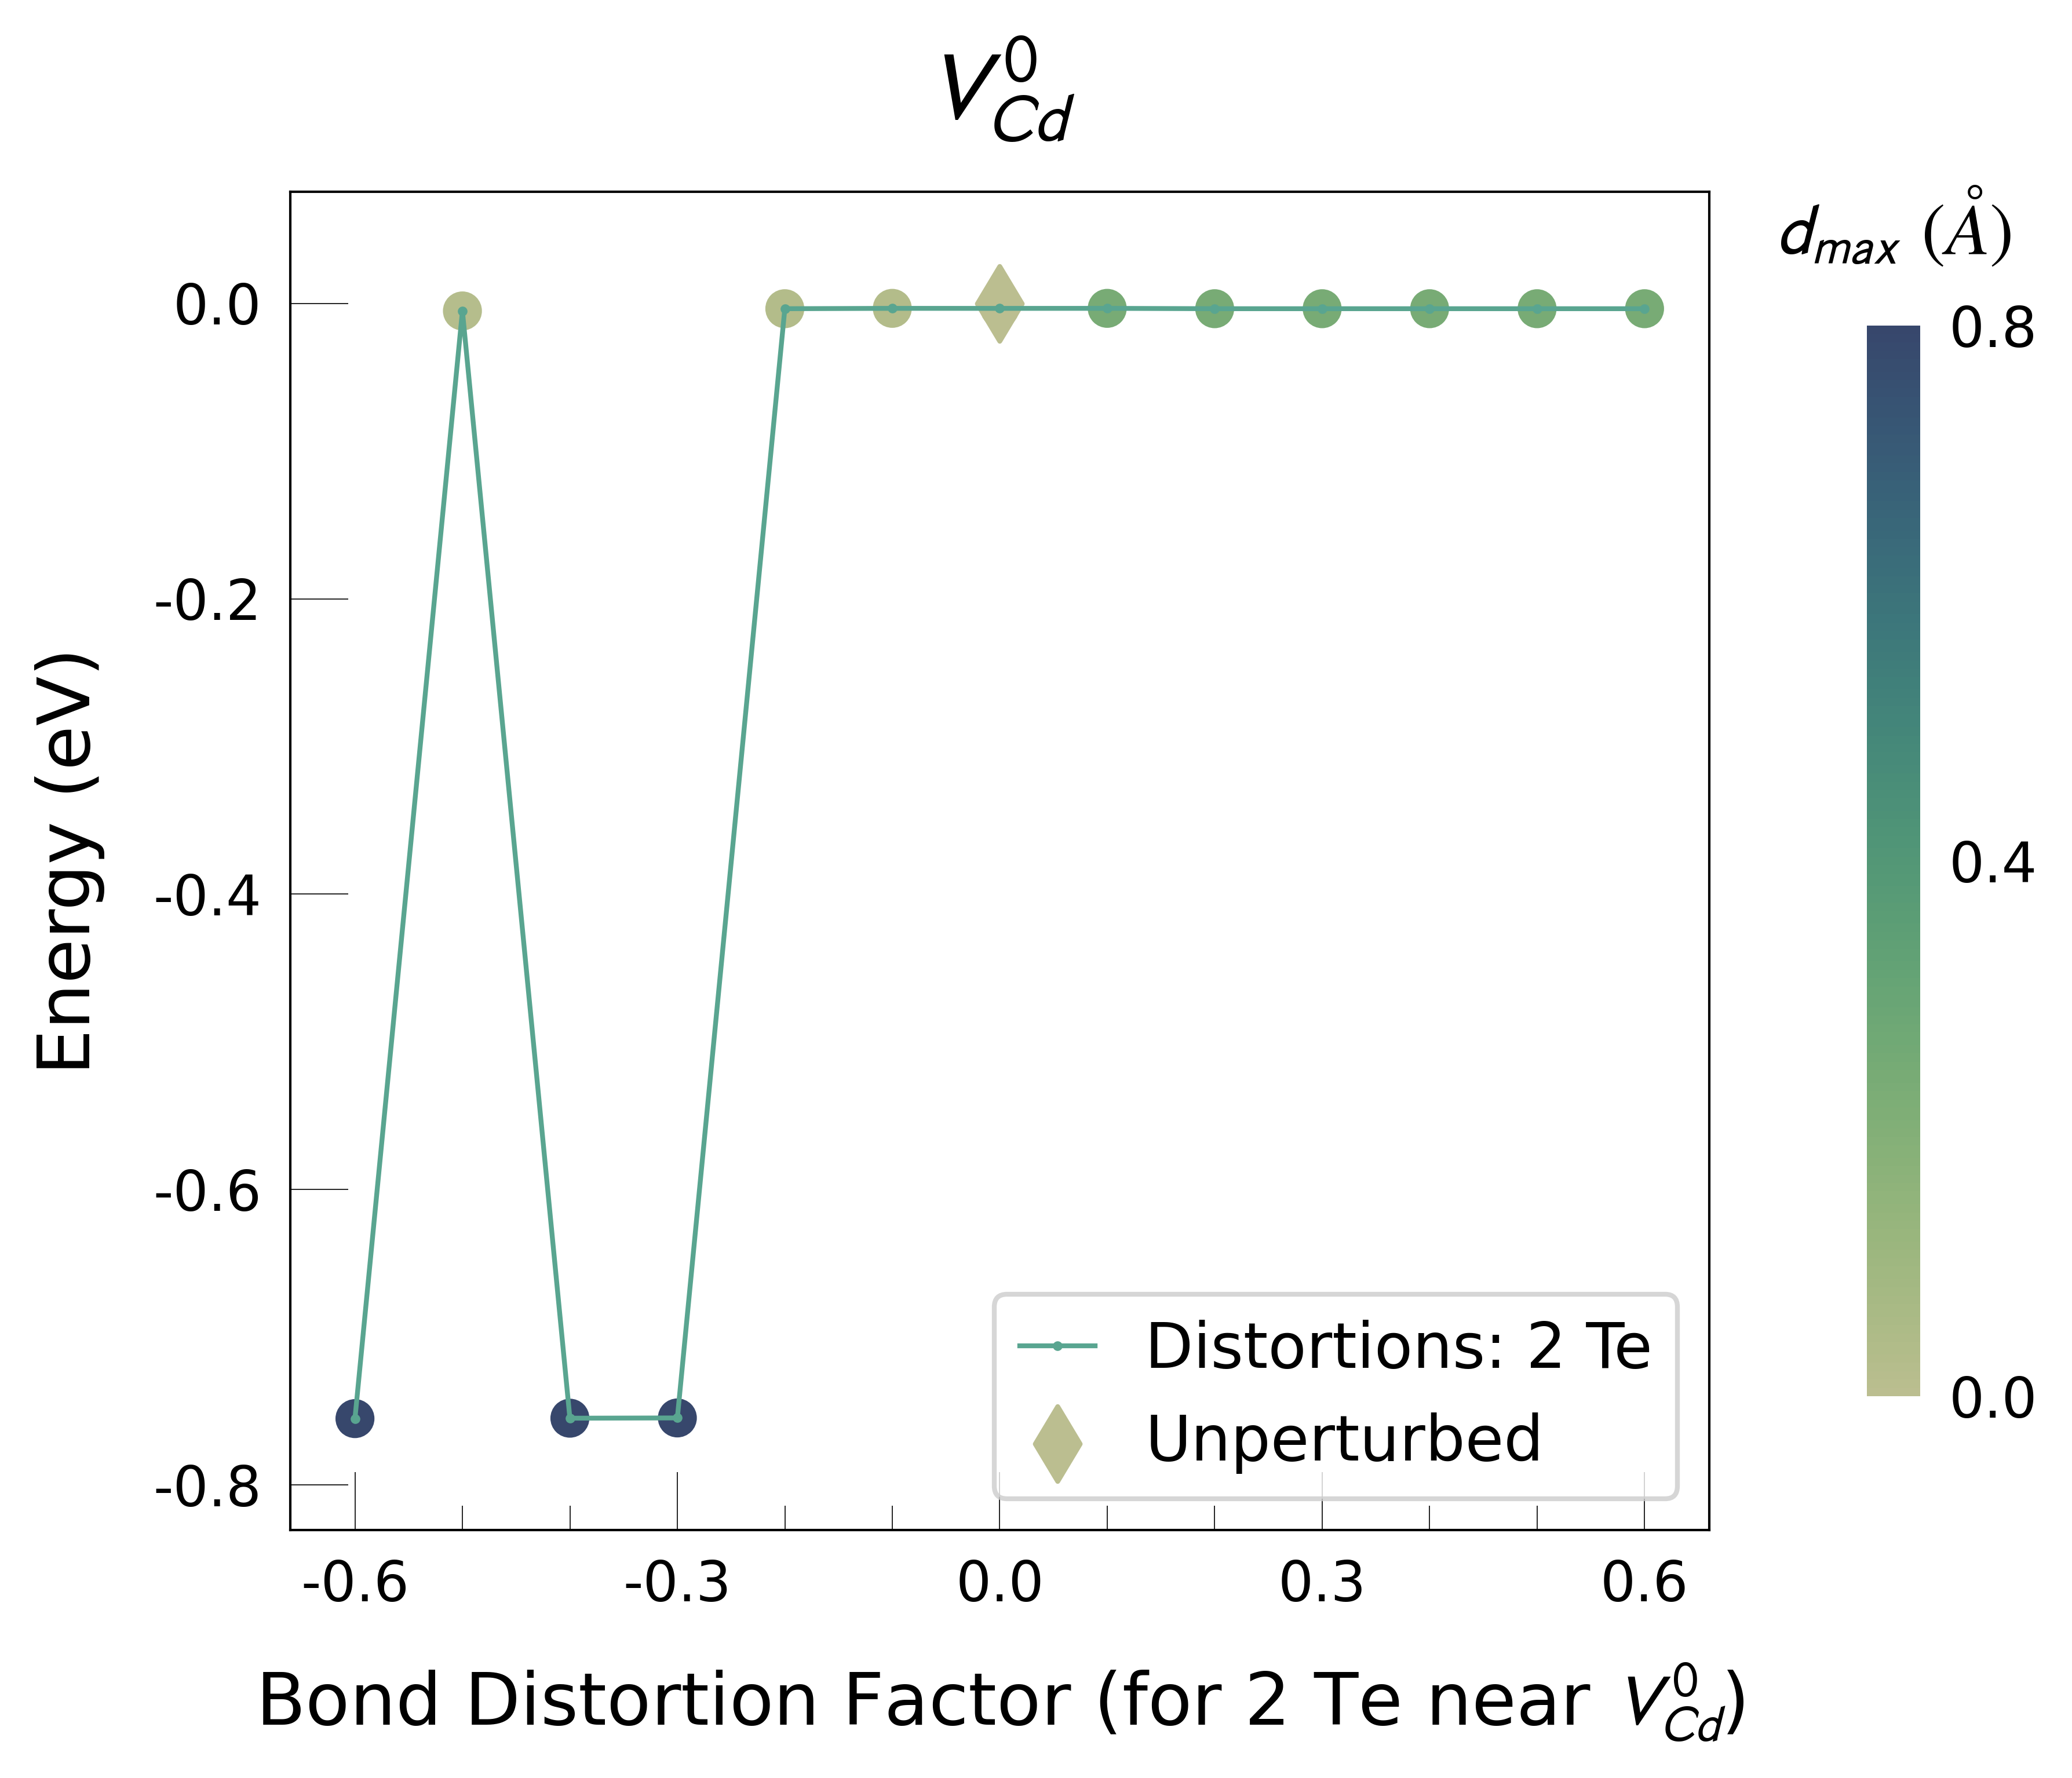

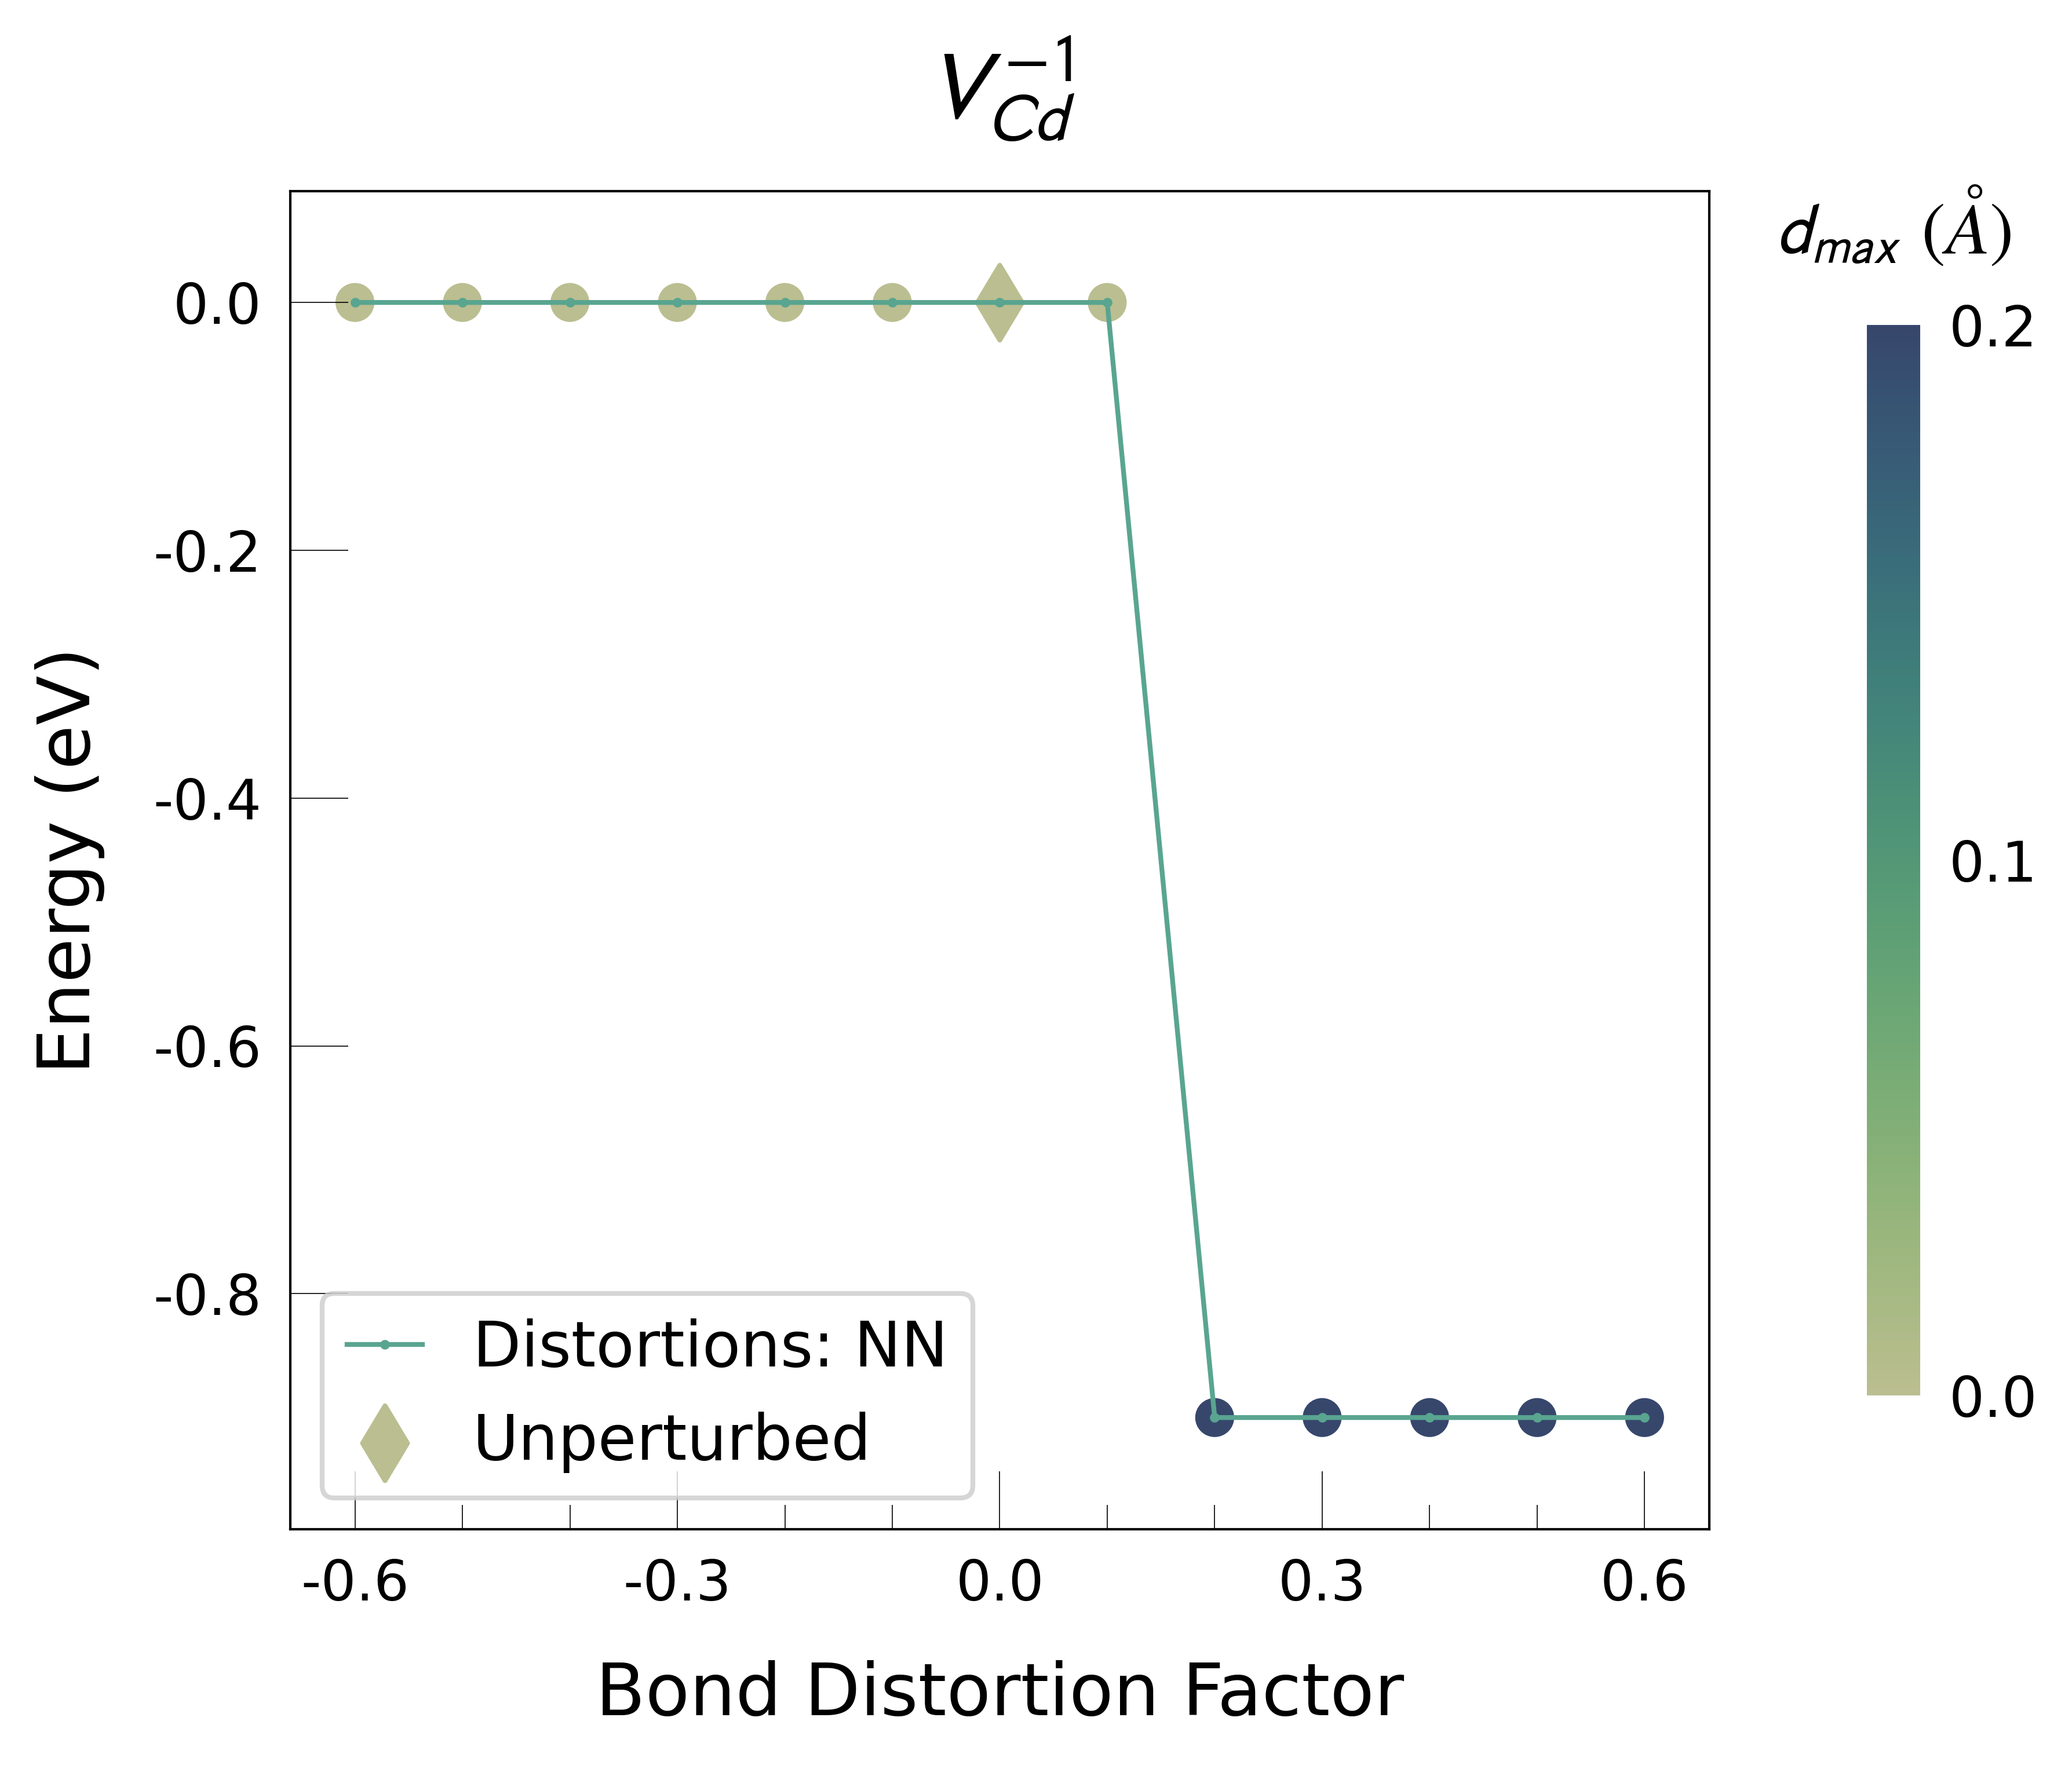

In [36]:
figs = plotting.plot_all_defects(
    defect_charges_dict,
    add_colorbar=True
)

This prints the distortion plots for all defects where a significant energy lowering distortion, relative to the standard unperturbed relaxation, was identified. The threshold energy difference to consider as 'significant' is controlled by the `min_e_diff` optional parameter (default = 0.05 eV).

So for these example results, we find energy lowering distortions for $V_{Cd}^0$ (at -0.3, -0.4 and -0.6 bond distortion factors) and $V_{Cd}^{-1}$ (from 0.2 to 0.6 bond distortion factors). We should re-test these distorted structures for the $V_{Cd}$ charge states where these distortions were not found, in case they also give lower energies. 

Of course, this is not necessary if these structures were already found in the distortion tests for the other charge states, and so the `get_energy_lowering_distortions()` function automatically performs structure comparisons to determine which distortions should be tested in other charge states of the same defect, and which have already been found (see docstring for more details). 

In the output of `get_energy_lowering_distortions()` (which we saved to `low_energy_defects` in the earlier cell), we get a dictionary of defects for which bond distortion found an energy-lowering distortion (which is missed with normal unperturbed relaxation), of the form {defect: [list of distortion dictionaries (with corresponding charge states, energy lowering, distortion factors, structures and charge states for which these structures weren't found)]}.

For example, our results with $V_{Cd}$ show that we found an energy-lowering distortion for the neutral case (`subdict["charges"]`) which wasn't found with the -2 or -1 charge states (`subdict["excluded_charges"]`) – and so we'll test this distorted structures with those charge states – and also an energy-lowering distortion for -1 which wasn't found with 0 or -2 charge states.

In [37]:
for index, subdict in enumerate(low_energy_defects["vac_1_Cd"]):
    print(f"Energy lowering distortion number {index}")
    print("Found for charge states:", subdict["charges"])  # Charge state for which the energy lowering was found
    print(f"Not found in:", subdict["excluded_charges"], "\n")

Energy lowering distortion number 0
Found for charge states: [0]
Not found in: {-2, -1} 

Energy lowering distortion number 1
Found for charge states: [-1]
Not found in: {0, -2} 



This generates the new distorted structures and VASP inputs, to do our quick second round of structure testing (energy-lowering distortions found for at least one, but not all charge states for a given defect):

In [38]:
energy_lowering_distortions.write_distorted_inputs(low_energy_defects)

Writing low-energy distorted structure to ./vac_1_Cd_-2/Bond_Distortion_-60.0%_from_0
Writing low-energy distorted structure to ./vac_1_Cd_-1/Bond_Distortion_-60.0%_from_0
Writing low-energy distorted structure to ./vac_1_Cd_0/Bond_Distortion_20.0%_from_-1
Writing low-energy distorted structure to ./vac_1_Cd_-2/Bond_Distortion_20.0%_from_-1


Note here the nomenclature we use for the distorted structures we've imported from other charge states (i.e. `Bond_Distortion_-60.0%_from_0` refers to the structure obtained from relaxing the -60% distortion of the neutral (q = 0) charge state).

We can send these additional test distortions to the HPCs using this `bash` code:
```bash
for defect in ./*{_,_-}[0-9]/; do cd $defect; for distortion in *from*/; do scp -r ${distortion} {remote_machine}:{path to ShakeNBreak folders}/${defect}${distortion}; done; cd ..; done
```
If you're using MacOS (i.e. `zsh` shell) you may need to run this command first for this loop to work:
```bash
setopt +o nomatch
```

Again we run the calculations on the HPCs, then parse and download the data to our local folders (e.g. using the same `for` loops above), but again in this example notebook we'll use our fake example data **_for demonstration purposes_** as in the next cell, but don't do this if you're actually running the calculations!

```python
!cp ./vac_1_Cd_0/vac_1_Cd_0_additional_distortions.yaml ./vac_1_Cd_0/vac_1_Cd_0.yaml
!cp ./vac_1_Cd_-1/vac_1_Cd_-1_additional_distortions.yaml ./vac_1_Cd_-1/vac_1_Cd_-1.yaml
!cp ./vac_1_Cd_-2/vac_1_Cd_-2_additional_distortions.yaml ./vac_1_Cd_-2/vac_1_Cd_-2.yaml
!cp ./vac_1_Cd_0/Bond_Distortion_-60.0%/CONTCAR ./vac_1_Cd_-1/Bond_Distortion_-60.0%_from_0/
!cp ./vac_1_Cd_0/Bond_Distortion_-60.0%/CONTCAR ./vac_1_Cd_-2/Bond_Distortion_-60.0%_from_0/
!cp ./vac_1_Cd_-1/Unperturbed/CONTCAR ./vac_1_Cd_-2/Bond_Distortion_20.0%_from_-1/
!cp ./vac_1_Cd_-1/Unperturbed/CONTCAR ./vac_1_Cd_0/Bond_Distortion_20.0%_from_-1/
```

Then re-parse with the same `get_energy_lowering_distortions()` function from before:

In [2]:
low_energy_defects = energy_lowering_distortions.get_energy_lowering_distortions(
    defect_charges_dict)


vac_1_Cd
vac_1_Cd_-2: Energy difference between minimum, found with 20.0%_from_-1 bond distortion, and unperturbed: -1.90 eV.
Energy lowering distortion found for vac_1_Cd with charge -2. Adding to low_energy_defects dictionary.
vac_1_Cd_0: Energy difference between minimum, found with -0.6 bond distortion, and unperturbed: -0.76 eV.
Comparing structures to specified ref_structure (Cd31 Te32)...
New (according to structure matching) low-energy distorted  structure found for vac_1_Cd_0, adding to low_energy_defects['vac_1_Cd'] list.
vac_1_Cd_-1: Energy difference between minimum, found with -60.0%_from_0 bond distortion, and unperturbed: -1.20 eV.
Comparing structures to specified ref_structure (Cd31 Te32)...
Comparing structures to specified ref_structure (Cd31 Te32)...
Low-energy distorted structure for vac_1_Cd_-1 already found with charge states [0], storing together.

Comparing and pruning defect structures across charge states...
Comparing structures to specified ref_structure (C

Finally we can replot the results from all our distortion tests:

Plot saved to vac_1_Cd_-2/vac_1_Cd_-2.svg
Plot saved to vac_1_Cd_0/vac_1_Cd_0.svg
Plot saved to vac_1_Cd_-1/vac_1_Cd_-1.svg


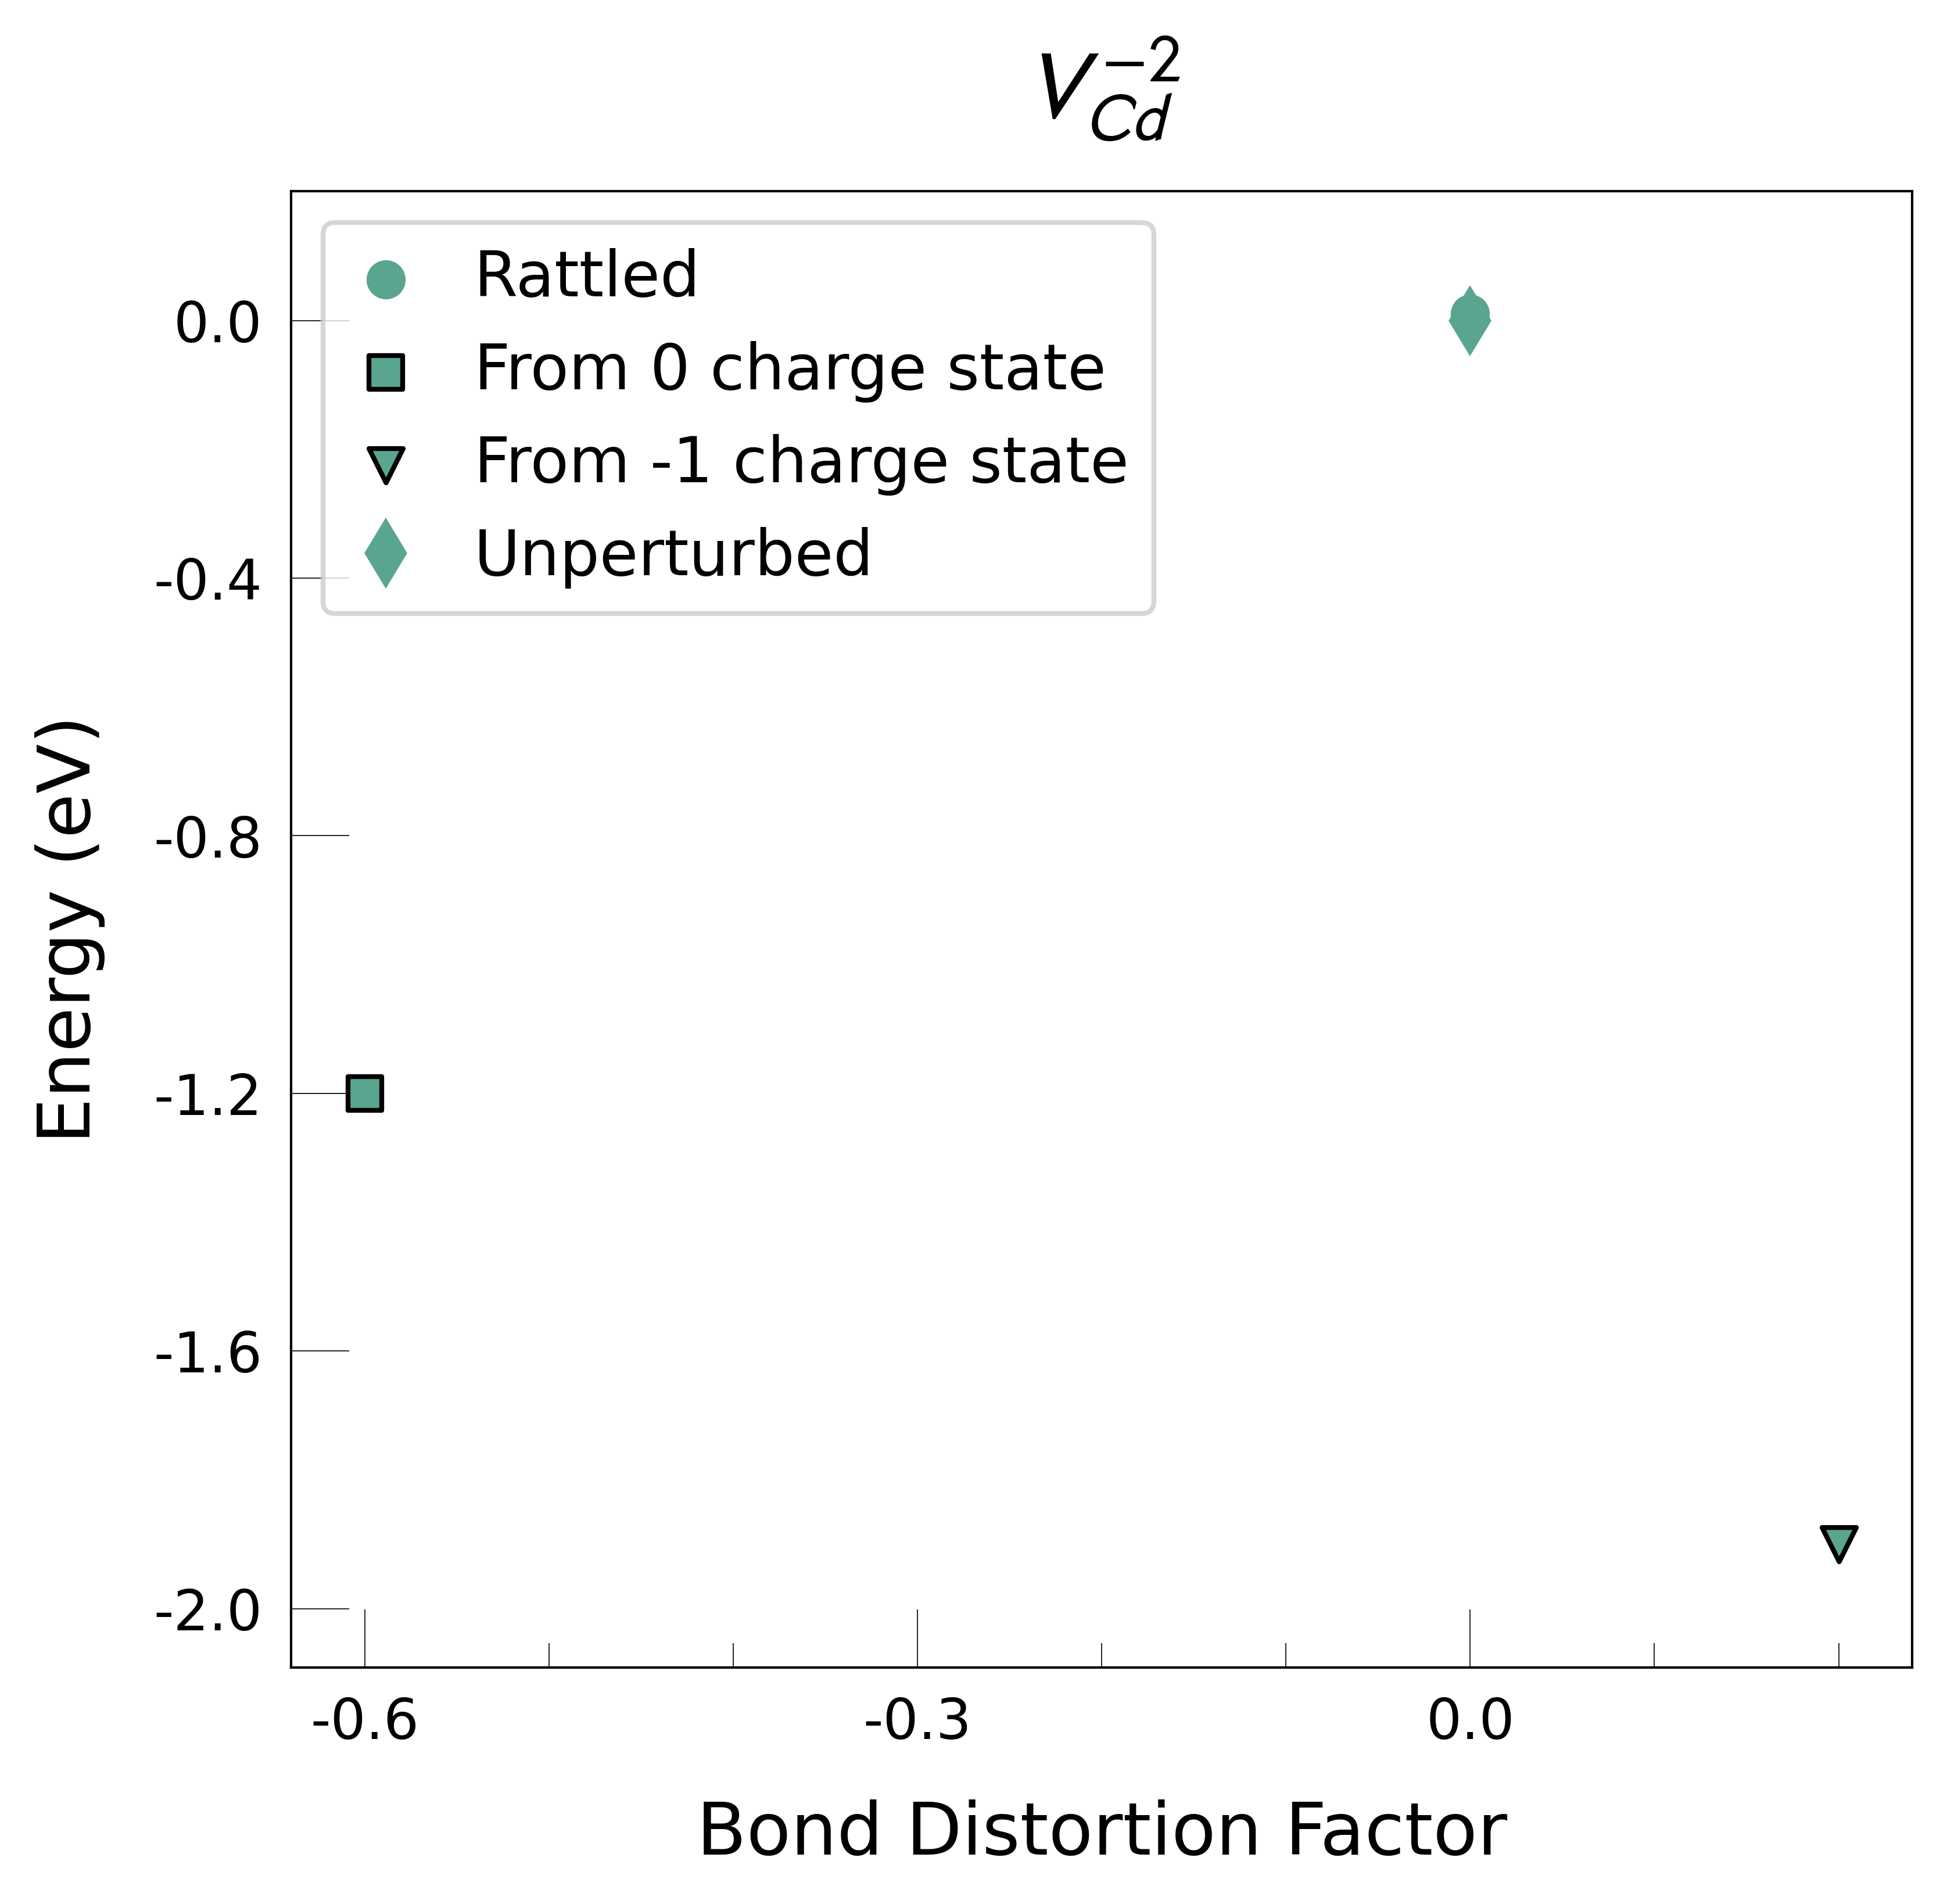

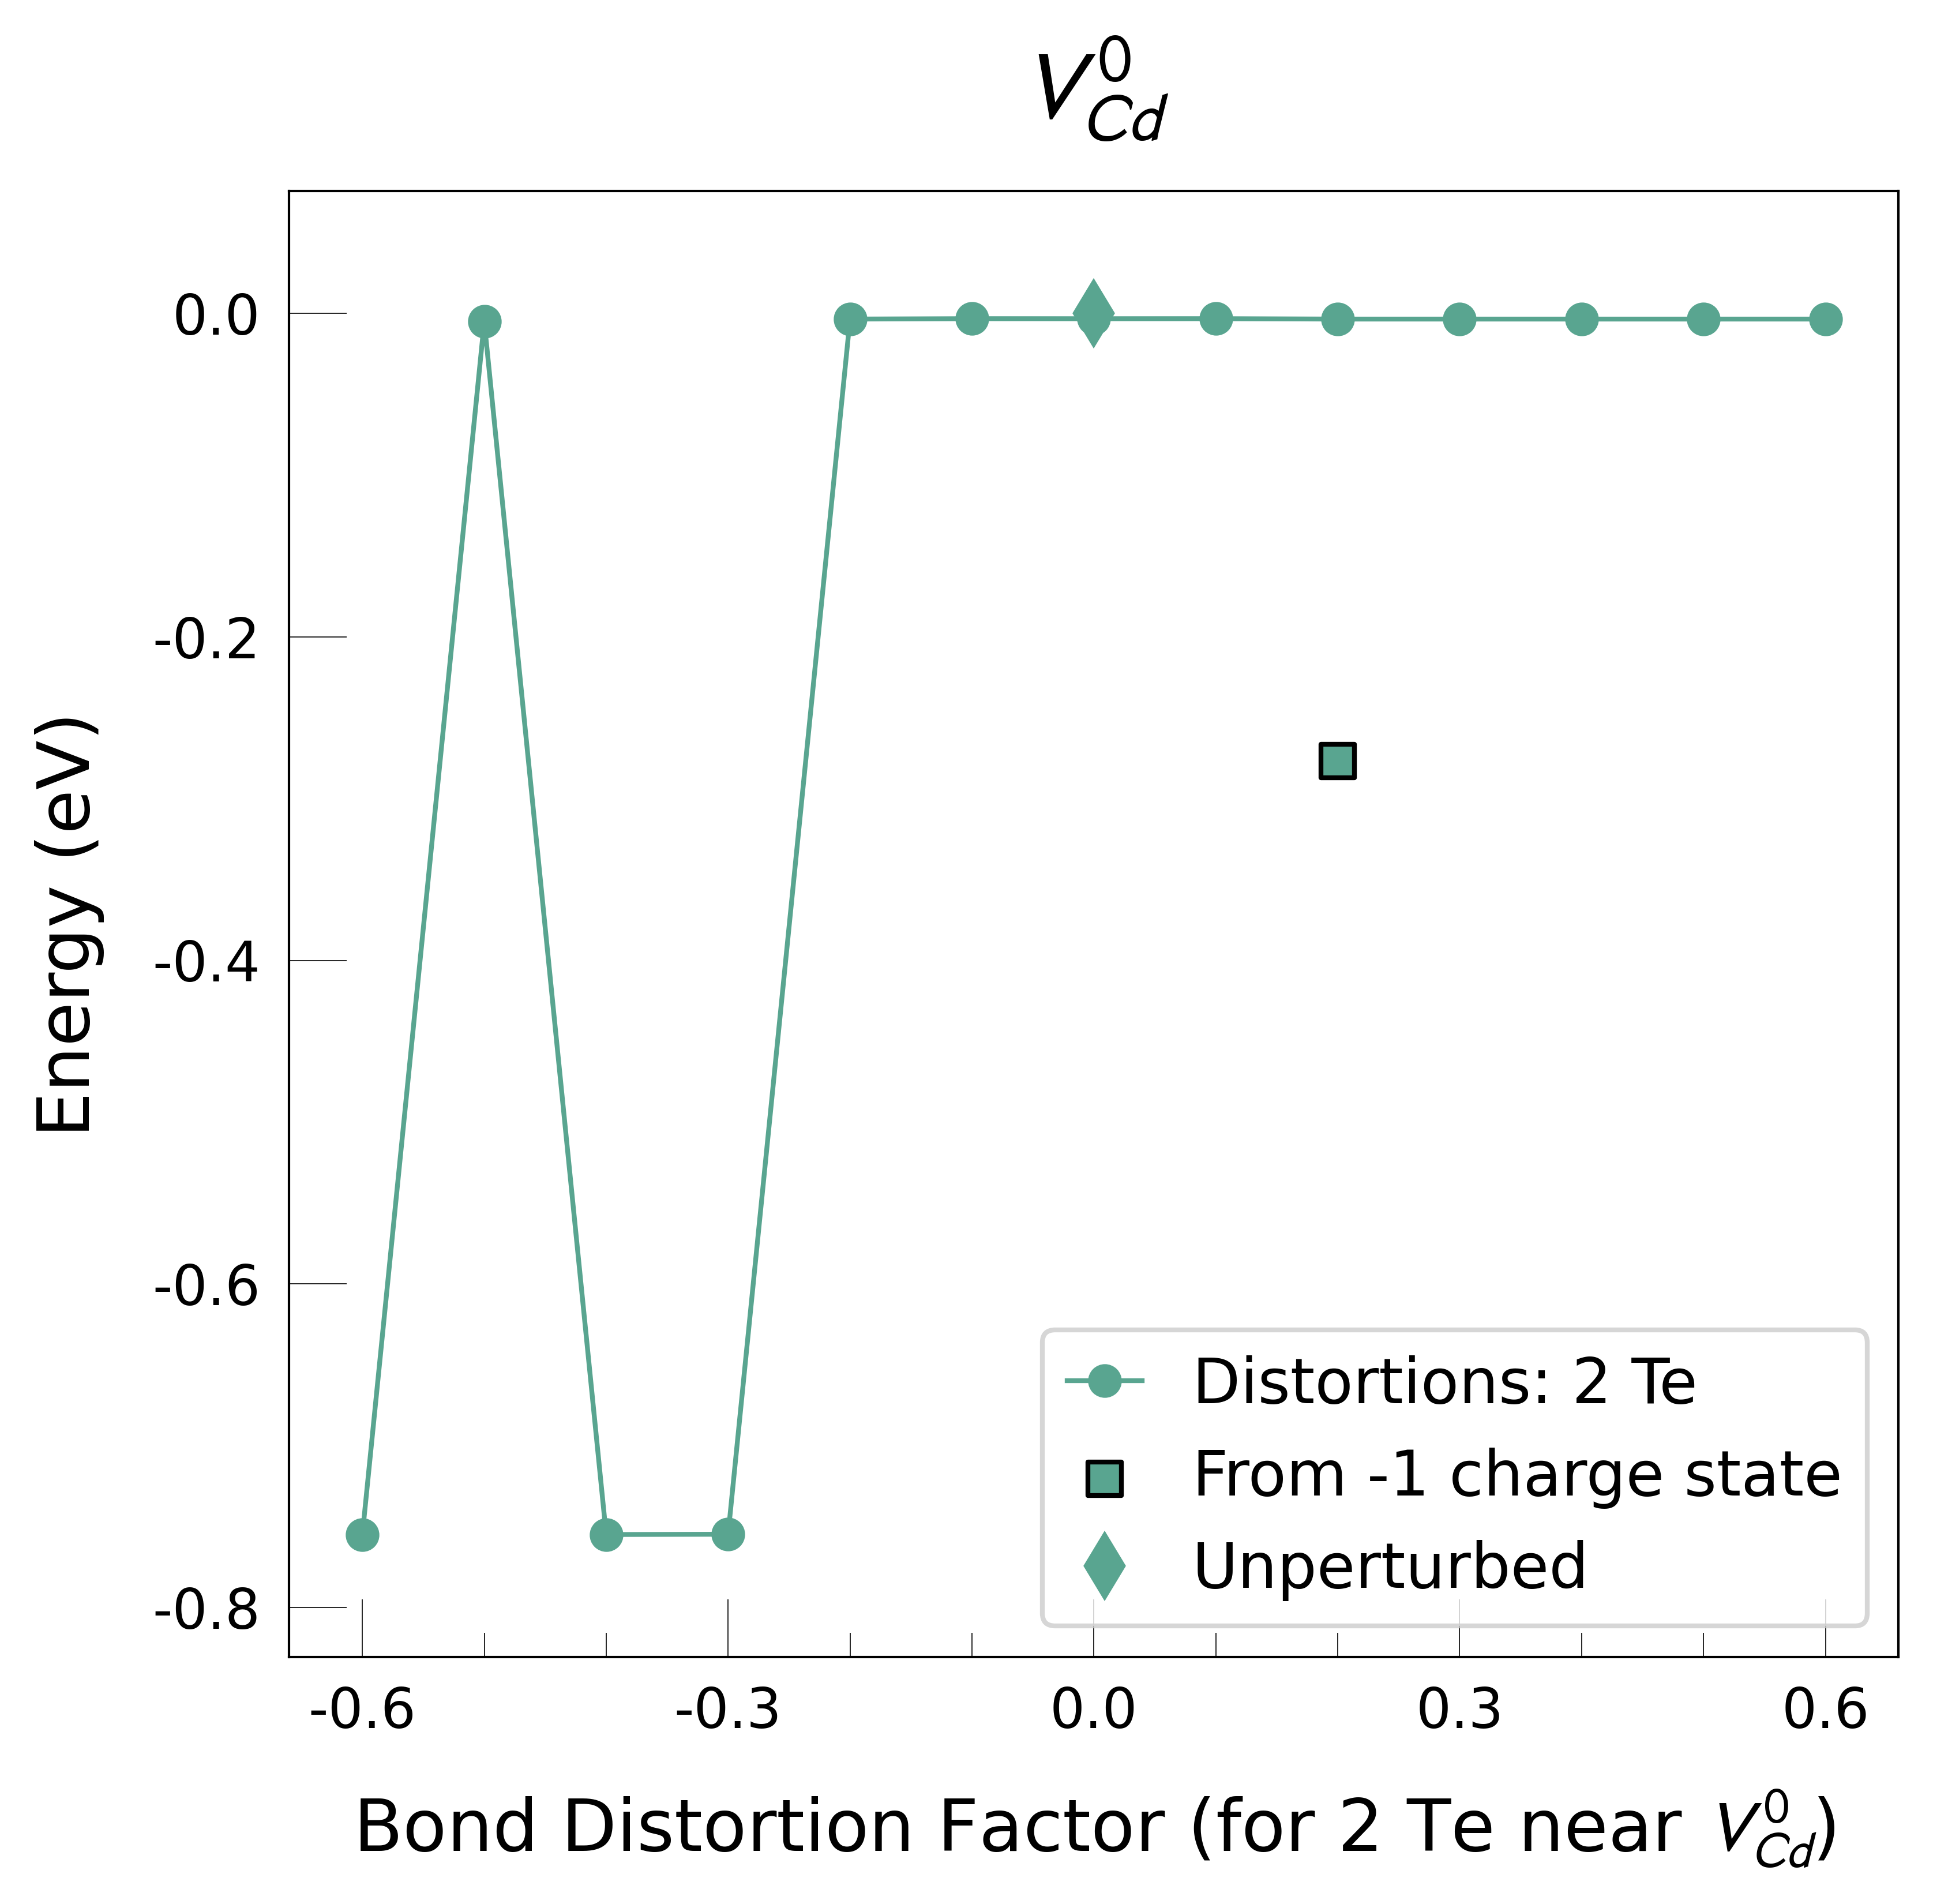

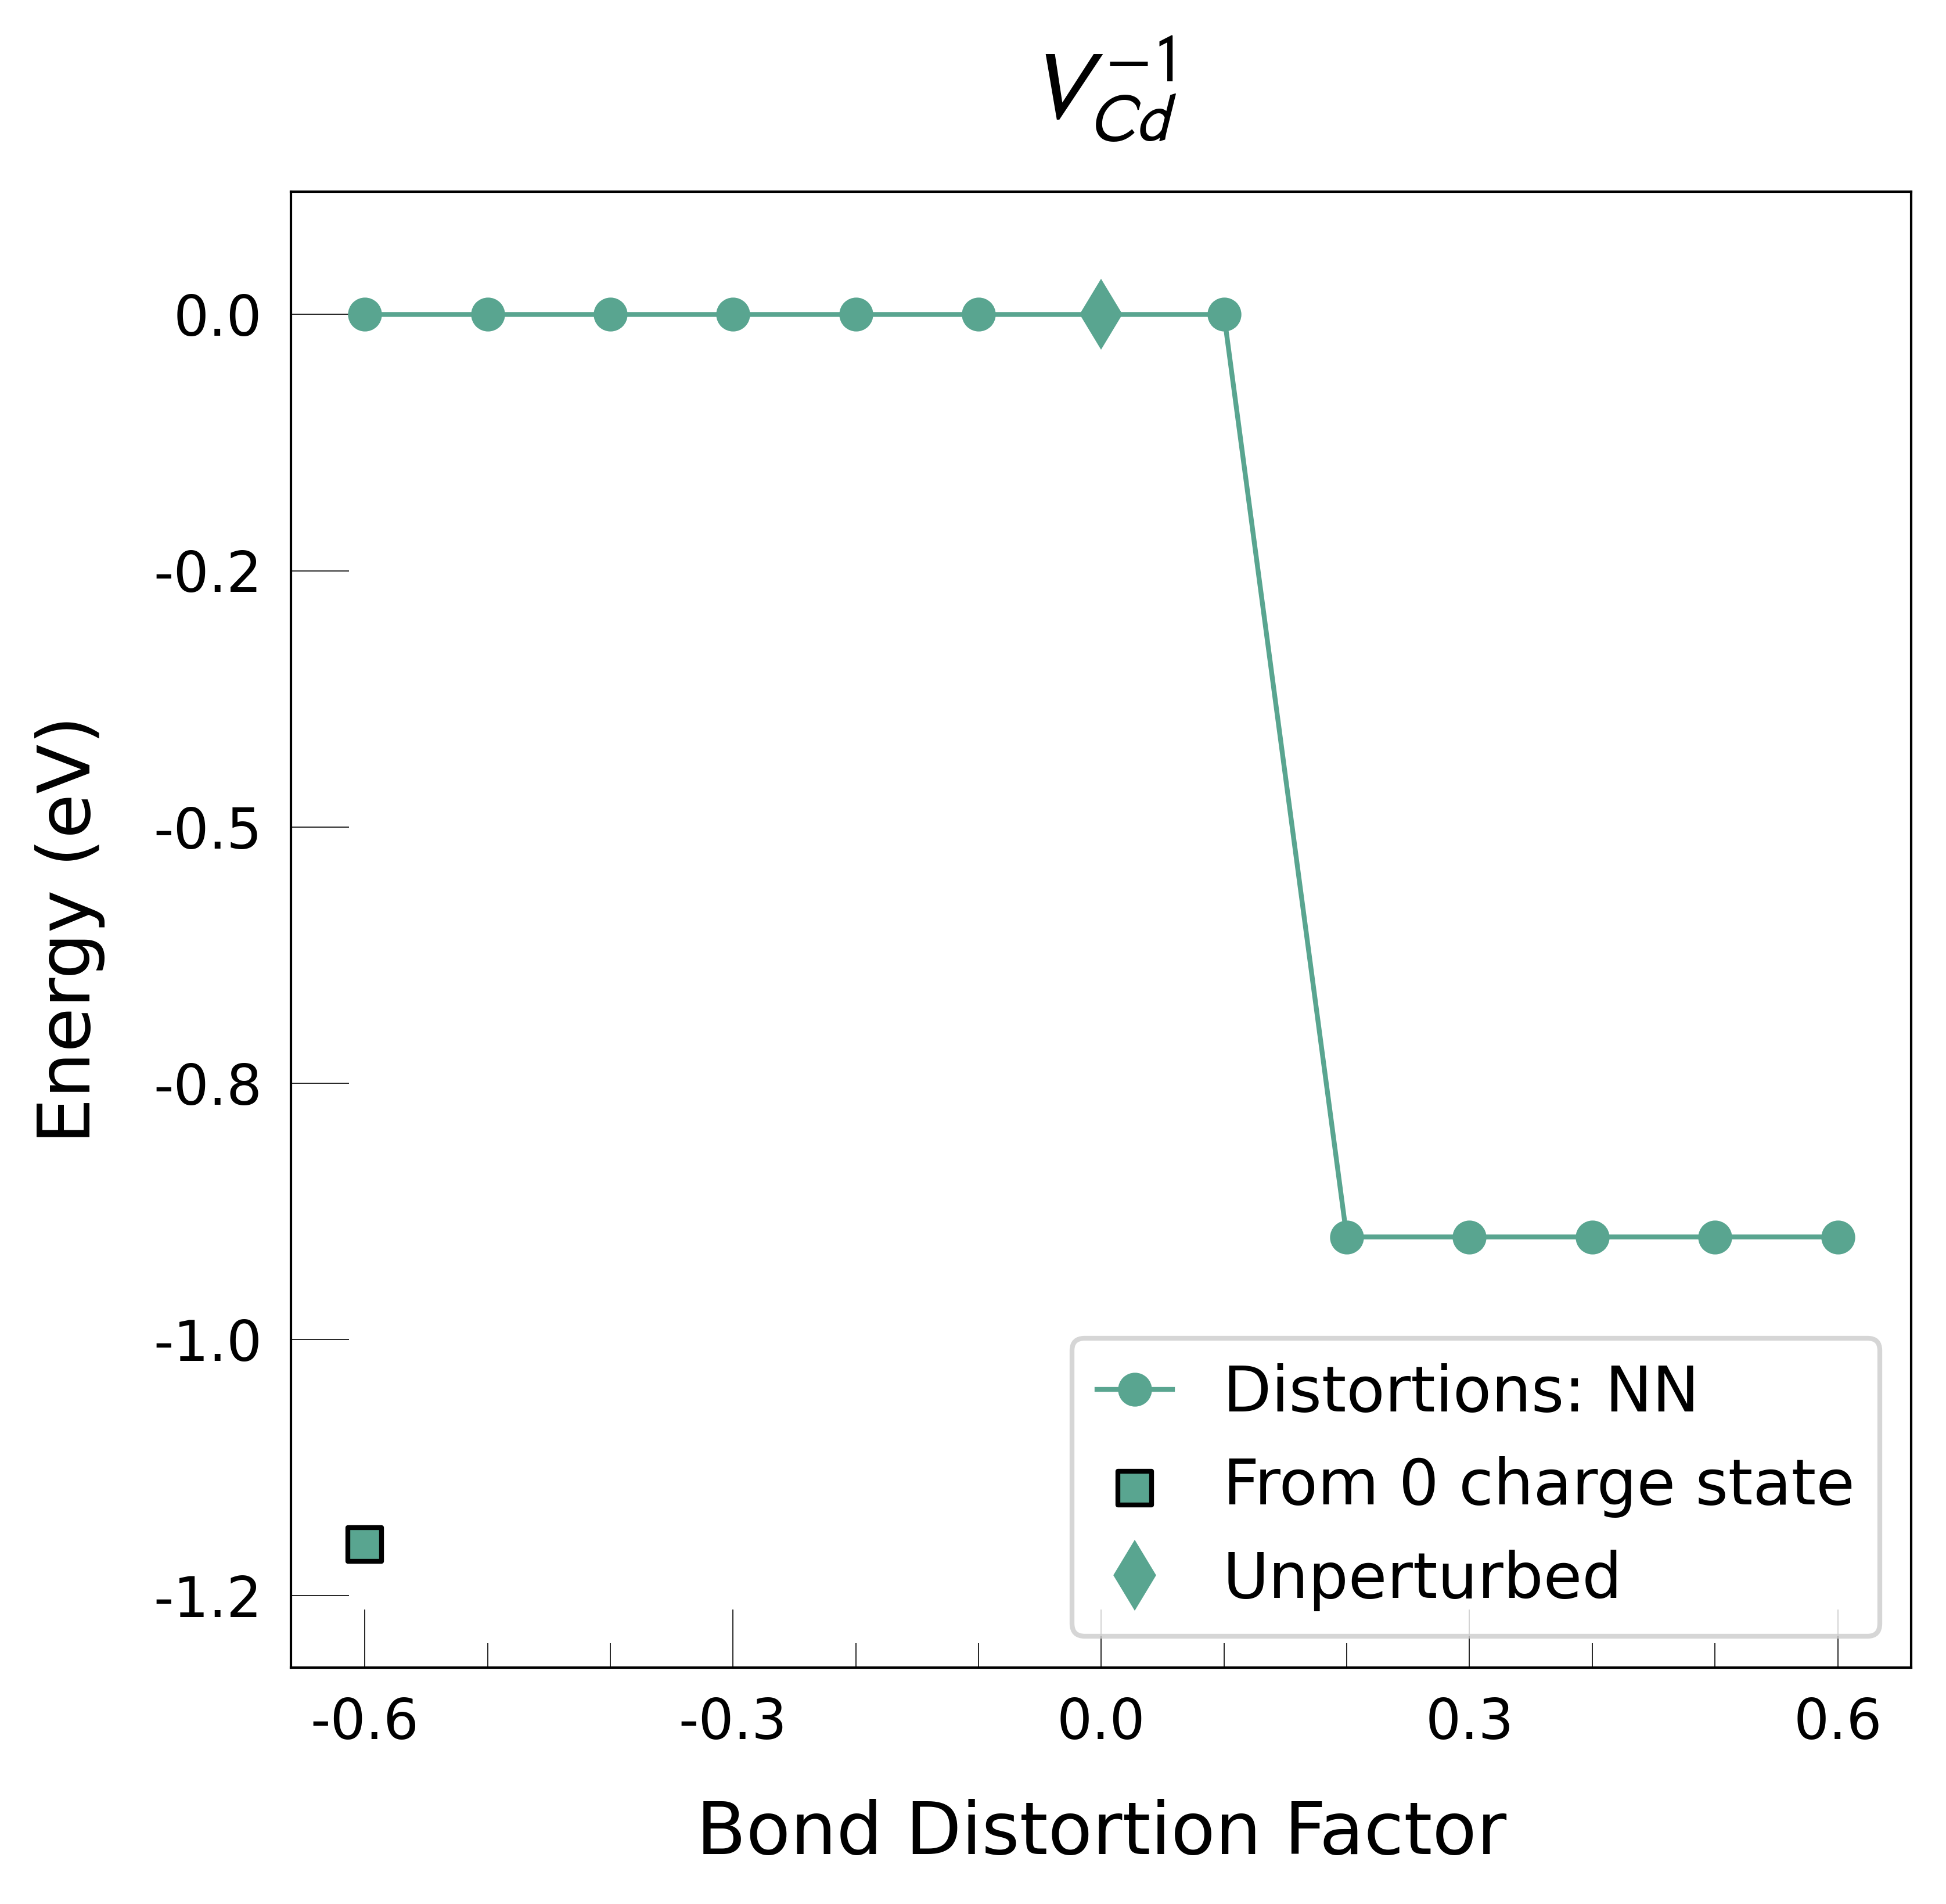

In [5]:
figs = plotting.plot_all_defects(defect_charges_dict)

In this example case, for $V_{Cd}^{0}$ the distorted structure originally found for the -1 charge state comes out lower energy than the $V_{Cd}^{0}$ unperturbed relaxation, but still higher energy than the previously identified ground-state at -0.3, -0.4 and -0.6 distortion factors. 

For $V_{Cd}^{-1}$, the distorted structure originally found for the neutral (0) charge state comes out lower energy than the previously identified ground-state at distortion factors >0.2.

We now continue our defect calculations using the ground-state `CONTCAR`s we've obtained for each defect, with our fully-converged `INCAR` and `KPOINTS` settings (via the `doped` `vasp_input.vasp_std_files()` functions below, to get our final defect formation energies (confident that we've identified the ground-state defect structure!). The `energy_lowering_distortions.write_groundstate_structure()` function automatically writes these lowest-energy structures to our defect folders:

In [6]:
energy_lowering_distortions.write_groundstate_structure()

In [7]:
!head vac_1_Cd_0/groundstate_POSCAR  # groundstate structure from -60% distortion relaxation

-60.0%_Bond__vac_1_Cd[0. 0. 0.]_-dNELECT
   1.0000000000000000     
    13.0867679999999993    0.0000000000000000    0.0000000000000000
     0.0000000000000000   13.0867679999999993    0.0000000000000000
     0.0000000000000000    0.0000000000000000   13.0867679999999993
   Cd   Te
    31    32
Direct
  0.0014403846070577  0.0152341826280604  0.4960600473735149
  0.0018443102488570  0.5161087673464303 -0.0040398656877614


In [8]:
!diff vac_1_Cd_0/groundstate_POSCAR vac_1_Cd_0/Bond_Distortion_-60.0%/CONTCAR  # groundstate structure from -60% distortion relaxation

We can also optionally analyse the defect distortions found with `SnB` using the `compare_structures()`, `analyse_structure()`, `get_homoionic_bonds()` and `get_site_magnetization()` functions from `shakenbreak.analysis`; see the [distortion analysis section](https://shakenbreak.readthedocs.io/en/latest/ShakeNBreak_Example_Workflow.html#optional-analyse-the-defect-distortions-found-with-snb) of the [SnB Python API tutorial](https://shakenbreak.readthedocs.io/en/latest/ShakeNBreak_Example_Workflow.html) for more.

## Prepare `vasp_std` relaxation calculation files

Generate VASP input files (**INCAR**, **POTCAR** and **KPOINTS**) for `vasp_std` defect relaxations with the converged k-point mesh.

In [12]:
cdte_vacancies = vasp_input.prepare_vasp_defect_inputs(vacancies_only)
# Generates a dictionary of folders for VASP defect calculations, matching those written by ShakeNBreak

# Can do the same with the substitutions and interstitials with:
# cdte_substitutions = prepare_vasp_defect_inputs(substitutions_only)
# cdte_interstitials = prepare_vasp_defect_inputs(interstitials_only)

vac_1_Cd_-2
vac_1_Cd_-1
vac_1_Cd_0
vac_2_Te_0
vac_2_Te_1
vac_2_Te_2


In [11]:
cdte_vacancies  # Expand the output of this cell to see what the prepare_vasp_defect_inputs output
# dictionary looks like

{'vac_1_Cd_-2': {'Defect Structure': Structure Summary
  Lattice
      abc : 13.086768 13.086768 13.086768
   angles : 90.0 90.0 90.0
   volume : 2241.2856479961474
        A : 13.086768 0.0 0.0
        B : 0.0 13.086768 0.0
        C : 0.0 0.0 13.086768
  PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
  PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
  PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
  PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
  PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
  PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
  PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
  PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
  PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
  PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
  PeriodicSite: Cd (0.0000, 9.8151, 9.8151) [0.0000, 0.

The next code block shows the function description - can do this for other functions to check the docstring for required arguments etc.

In [13]:
vasp_input.prepare_vasp_defect_inputs?

Signature: vasp_input.prepare_vasp_defect_inputs(defects: dict) -> dict
Docstring:
Generates a dictionary of folders for VASP defect calculations
Args:
    defects (dict):
        Dictionary of defect-object-dictionaries from PyCDT's
        ChargedDefectsStructures class (see example notebook)
File:      ~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Bread/Projects/Packages/doped/doped/vasp_input.py
Type:      function


In [4]:
vasp_input.vasp_std_files?

Signature:
vasp_input.vasp_std_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
    kpoints_settings: dict = None,
    potcar_settings: dict = None,
) -> None
Docstring:
Generates INCAR, POTCAR and KPOINTS for vasp_std expensive k-point mesh relaxation.
For POSCAR, use on command-line (to continue on from vasp_gam run):
'cp vasp_gam/CONTCAR vasp_std/POSCAR; cp vasp_gam/CHGCAR vasp_std/'
Args:
    single_defect_dict (dict):
        Single defect-dictionary from prepare_vasp_defect_inputs()
        output dictionary of defect calculations (see example notebook)
    input_dir (str):
        Folder in which to create vasp_std calculation inputs folder
        (Recommended to set as the key of the prepare_vasp_defect_inputs()
        output directory)
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs o

Note that defect charge states in VASP are determined by the `NELECT` `INCAR` tag (number of electrons), which is automatically determined by `doped` **based on the choice of `POTCAR`s**. The default in `doped` (and `ShakeNBreak`) is to use the `MPRelaxSet` `POTCAR`s, but if you're using different ones, make sure to set `potcar_settings` in the `vasp_input.vasp_xxx_files()` functions, so that `NELECT` is then set accordingly! Hint, to change the functional or the actual potcar you use: `potcar_settings={'POTCAR_FUNCTIONAL': 'PBE_54', 'POTCAR': {'Ti': 'Ti'}}`

**Note:** In order to use this function to generate the input `POTCAR` files for the `VASP` calculations, you need to have your pseudopotential directory (`PSP_VASP_DIR`) set in your `.pmgrc.yaml` file (see https://pymatgen.org/usage.html#setting-the-pmg-mapi-key-in-the-config-file).

Run the following cell to see what the default `INCAR` settings are:

In [3]:
vasp_input.vasp_std_files??

Signature:
vasp_input.vasp_std_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
    kpoints_settings: dict = None,
    potcar_settings: dict = None,
) -> None
Source:   
def vasp_std_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
    kpoints_settings: dict = None,
    potcar_settings: dict = None,
) -> None:
    """
    Generates INCAR, POTCAR and KPOINTS for vasp_std expensive k-point mesh relaxation.
    For POSCAR, use on command-line (to continue on from vasp_gam run):
    'cp vasp_gam/CONTCAR vasp_std/POSCAR; cp vasp_gam/CHGCAR vasp_std/'
    Args:
        single_defect_dict (dict):
            Single defect-dictionary from prepare_vasp_defect_inputs()
            output dictionary of defect calculations (see example notebook)
        input_dir (str):
            Folder in which to create vasp_std calculation inputs folder
            (Recommended to set as the key of the prepare_vasp

In [44]:
for key, val in cdte_vacancies.items():
    vasp_input.vasp_std_files(
        val,
        input_dir=key,
        incar_settings={"ENCUT": 350},  # Custom INCAR settings
        #kpoints_settings={"generation_style": "Monkhorst", "kpoints": [[3, 3, 3]]}, # Custom KPOINTS settings
    )  
# Prepare the vasp_std relaxation input files (in "{defect_folder}/vasp_std")
# Highly recommended to look at output INCARs or doped.vasp_input source code,
# to see what the default INCAR settings are.

Have a look at the `{defect_folder}/vasp_std/` input files!

In [ ]:
!head vac_1_Cd_0/vasp_std/INCAR

Then we can use the following code to copy in our `Groundstate` `POSCAR`s from `ShakeNBreak` to continue with the final defect calculations:
```bash
for defect in ./*{_,_-}[0-9]/; do cd $defect; cp groundstate_POSCAR vasp_std; cp vasp_std/{groundstate_POSCAR,POSCAR}; cd ..; done
```

If you are not using the `ShakeNBreak` approach, then you can use `vasp_input.vasp_gam_files` to generate the undistorted defect structures (`POSCAR`s).

## Prepare `vasp_ncl` single-shot spin-orbit coupling calculation files
(this mightn't be necessary if SOC isn't important for your system)

Generates **INCAR** for `vasp_ncl` single-shot SOC energy calculation on
`vasp_std`-relaxed defect structure.
For **POSCAR**, **POTCAR**, **KPOINTS**, use on command-line (to continue on from `vasp_std` run):
```bash
cp vasp_std/CONTCAR vasp_ncl/POSCAR; cp vasp_std/{POTCAR,CHGCAR} vasp_ncl/
```
and 
```bash
cp vasp_std/IBZKPT vasp_ncl/KPOINTS
``` 
because you need to use non-symmetrised k-points (single-weighted) for accurate SOC calculations.

In [5]:
vasp_input.vasp_ncl_files?

Signature:
vasp_input.vasp_ncl_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
    kpoints_settings: dict = None,
    potcar_settings: dict = None,
) -> None
Docstring:
Generates INCAR, POTCAR and non-symmetrised KPOINTS for vasp_ncl single-shot SOC energy
calculation on vasp_std-relaxed defect structure.
For POSCAR, use on command-line (to continue on from vasp_std run):
'cp vasp_std/CONTCAR vasp_ncl/POSCAR'
Args:
    single_defect_dict (dict):
        Single defect-dictionary from prepare_vasp_defect_inputs()
        output dictionary of defect calculations (see example notebook)
    input_dir (str):
        Folder in which to create vasp_ncl calculation inputs folder
        (Recommended to set as the key of the prepare_vasp_defect_inputs()
        output directory)
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to

In [18]:
for key, val in cdte_vacancies.items():
    vasp_input.vasp_ncl_files(val, input_dir=key,
                              incar_settings={'ENCUT': 350})  # Custom INCAR settings
# Prepare the vasp_ncl relaxation input files (in "{defect_folder}/vasp_ncl")
# Highly recommended to look at output INCARs or doped.vasp_input source code,
# to see what the default INCAR settings are.

## Post-Processing and Corrections

### Processing Cadmium Interstitial `vasp_gam` calculations to see which coordination is favoured

In [9]:
from doped.pycdt.utils.parse_calculations import SingleDefectParser
import numpy as np

# Note that we've changed stol=0.5 (from 0.3) in the StructureMatcher test in PyCDT's SingleDefectParser
bulk_file_path = "Examples/Bulk_Supercell/"
dielectric = np.array([[9.13, 0, 0], [0., 9.13, 0], [0, 0, 9.13]])
defect_charge = 0

for i in ["Int_Cd_1_0", "Int_Cd_2_0", "Int_Cd_3_0"]:
    print(i)
    defect_file_path = f"Examples/{i}/vasp_gam/"

    # Note that we've added the optional argument initial_defect_structure to
    # SingleDefectParser.from_paths() in case PyCDT has trouble finding defect site
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge,
                                        # initial_defect_structure = try find it yourself PyCDT
                                        )
    print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV", "\n")
    sdp.get_stdrd_metadata()
    # No corrections yet (neutral defects with no bandfilling)

Int_Cd_1_0
Uncorrected energy: 2.096 eV 

Int_Cd_2_0


ValueError: Examples/Int_Cd_2_0/vasp_gam/transformation.json specified defect site [10.632999  2.453769 10.632999] Cd, but could not find it in initial_defect_structure. Abandoning parsing

Note that, because multiple relaxations were needed for `Int_Cd_2_0`, `PyCDT` can't find the initial defect site in the `vasprun.xml(.gz)` file. So, we've added the `initial_defect_structure` argument to the `SingleDefectParser.from_paths` function, to help it find it (using the original `POSCAR` generated by `vasp_input.vasp_gam_files` above).

In [3]:
Parsed_Int_Cd_Dict = {}
for i in ["Int_Cd_1_0", "Int_Cd_2_0", "Int_Cd_3_0"]:
    print(i)
    defect_file_path = f"Examples/{i}/vasp_gam/"

    # Note that we've added the optional argument initial_defect_structure to
    # SingleDefectParser.from_paths() in case PyCDT has trouble finding defect site
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge,
                                        initial_defect_structure=f"Examples/{i}/vasp_gam/POSCAR")

    print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV", "\n")
    sdp.get_stdrd_metadata()
    # No corrections yet (neutral defects with no bandfilling)

    # Keep dictionary of parsed defect entries
    Parsed_Int_Cd_Dict[i] = sdp.defect_entry

Int_Cd_1_0
Uncorrected energy: 2.096 eV 

Int_Cd_2_0
Uncorrected energy: 2.232 eV 

Int_Cd_3_0
Uncorrected energy: 2.232 eV 



`Int_Cd_2_0` and `Int_Cd_3_0` have suspiciously similar final energies (0.2 meV different), so chances are they relaxed to the same final structure.
Let's use `StructureMatcher` and `local_env` to double-check:

In [18]:
#  Expand this cell to see all the data stored in the Defect_Entry object
Parsed_Int_Cd_Dict['Int_Cd_1_0']

DefectEntry None - Int_Cd_mult32 - charge 0
Energy = 2.0956
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/
	defect_path = Int_Cd_1_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
	bulk_energy = -211.92624443 eV
	bulk_sc_structure = Full Formula (Cd32 Te32)
Reduced Formula: CdTe
abc   :  13.086768  13.086768  13.086768
angles:  90.000000  90.000000  90.000000
Sites (64)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Cd    0      0      0
  1  Cd    0      0      0.5
  2  Cd    0      0.5    0
  3  Cd    0      0.5    0.5
  4  Cd    0.5    0      0
  5  Cd    0.5    0      0.5
  6  Cd    0.5    0.5    0
  7  Cd    0.5    0.5    0.5
  8  Cd    0      0.25   0.25
  9  Cd    0      0.25   0.75
 10  Cd    0      0.75   0.25
 11  Cd    0      0.75   0.75
 12  Cd    0.5    0.25   0.25
 13  Cd    0.5    0.25   0.75
 14  Cd    0.5    0.75   0.25
 15  Cd    0.5    0.75   0.75
 16  Cd    0.25   0      0.25
 17  Cd    0

In [31]:
# Note: Pymatgen does have a 'PointDefectComparator' function, but only sometimes useful
# because it needs a defect object, and then uses
# Defect.generate_defect_structure() which will then wrongly tell you that two defects with
# inequivalent initial structures, but equivalent final structures, are not the same 
# Either way, all it does is check if the defect species is the same
# and then uses StructureMatcher on the initial structures.
# So it's better to just use StructureMatcher ourselves, on the final relaxed structures
from pymatgen.analysis.structure_matcher import StructureMatcher
sm = StructureMatcher()
print("Are Int_Cd_1_0 and Int_Cd_2_0 final structures the same?:", sm.fit(Parsed_Int_Cd_Dict['Int_Cd_1_0'].parameters['final_defect_structure'],
                                                                           Parsed_Int_Cd_Dict['Int_Cd_2_0'].parameters['final_defect_structure']))
print("Are Int_Cd_2_0 and Int_Cd_3_0 final structures the same?:", sm.fit(Parsed_Int_Cd_Dict['Int_Cd_2_0'].parameters['final_defect_structure'],
                                                                           Parsed_Int_Cd_Dict['Int_Cd_3_0'].parameters['final_defect_structure']))

Are Int_Cd_1_0 and _Int_Cd_2_0 final structures the same?: False
Are Int_Cd_2_0 and _Int_Cd_3_0 final structures the same?: True


In [24]:
from pymatgen.analysis.local_env import CrystalNN
for key, defect_entry in Parsed_Int_Cd_Dict.items():
    crystalNN = CrystalNN()
    struct = defect_entry.parameters['final_defect_structure']
    isite = 32  # Starts counting from zero! This is where the interstitial is
    print("Local order parameters (i.e. resemblence to given structural motif): ",
          crystalNN.get_local_order_parameters(struct, isite))
    print("Nearest-neighbour dictionary: ",
          crystalNN.get_cn_dict(struct, isite))
    # Bond Lengths?
    bond_lengths = []
    for i in crystalNN.get_nn_info(struct, isite):
        bond_lengths.append({'Element': i['site'].specie.as_dict()['element'],
                             'Distance': f"{i['site'].distance(struct[isite]):.3f}"})
    print("Bond-lengths (in Angstrom) to nearest neighbours: ", bond_lengths, "\n")

Local order parameters (i.e. resemblence to given structural motif):  None
Nearest-neighbour dictionary:  {'Te': 6, 'Cd': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}] 

Local order parameters (i.e. resemblence to given structural motif):  {'square co-planar': 0.08049643519922584, 'tetrahedral': 0.9999935468913711, 'rectangular see-saw-like': 0.007133072179242345, 'see-saw-like': 0.23547633536015408, 'trigonal pyramidal': 0.24644908542744104}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.911'}, {'Element':

So `Int_Cd_2_0` and `Int_Cd_3_0` have definitely relaxed to the same structure. This means we only need to continue with one of them for the more expensive `vasp_std` and `vasp_ncl` calculations.

Note that if you want to do this coordination environment analysis with a vacancy, you may have to introduce a fake atom at the vacancy position, in order to create a `pymatgen` `Site` object, to then use with `CrystalNN`. 
For example:

In [36]:
from pymatgen.analysis.local_env import CrystalNN
for defect_entry in vac_Cd_dpd.entries:
    dope_stuff.bold_print(f"{defect_entry.name}, Charge: {defect_entry.charge}")
    crystalNN = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False, search_cutoff=5)
    struct = defect_entry.parameters['final_defect_structure'].copy()
    struct.append('U', defect_entry.site.frac_coords) # Have to add a fake element
    isite = len(struct.sites) - 1 # Starts counting from zero!
    print("Local order parameters (i.e. resemblence to given structural motif): ", 
          crystalNN.get_local_order_parameters(struct,isite))
    print("Nearest-neighbour dictionary: ", crystalNN.get_cn_dict(struct,isite))
    # Bond Lengths?
    bond_lengths = []
    for i in crystalNN.get_nn_info(struct,isite):
        bond_lengths.append({'Element': i['site'].specie.as_dict()['element'], 
                             'Distance': f"{i['site'].distance(struct[isite]):.3f}"})
    print("Bond-lengths (in Angstrom) to nearest neighbours: ",bond_lengths,"\n")

Vac_Cd_mult32, Charge: -2
Local order parameters (i.e. resemblence to given structural motif):  {'square co-planar': 0.07996848894580866, 'tetrahedral': 0.999999999996243, 'rectangular see-saw-like': 0.007024644113827354, 'see-saw-like': 0.23425369905750856, 'trigonal pyramidal': 0.24520967518806777}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}] 

Vac_Cd_mult32, Charge: 0
Local order parameters (i.e. resemblence to given structural motif):  {'square co-planar': 0.08150258713827398, 'tetrahedral': 0.9998679826557854, 'rectangular see-saw-like': 0.007314581470890161, 'see-saw-like': 0.23430515920411413, 'trigonal pyramidal': 0.24525978735323237}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.610'}, {'Elemen

### Corrections for Charged Defects

Testing the correct magnetic ground state (by varying the `NUPDOWN` = difference in number of spin-up vs spin-down electrons)

In [10]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_gam/"
dielectric = 9.13 * np.array([[1., 0, 0], [0., 1., 0], [0, 0, 1.]])
defect_charge = -2

for i in [0, 2, 4]:
    print(f"NUPDOWN = {i}")
    defect_file_path = "Examples/as_1_Cd_on_Te_-2/NUPDOWN_" + str(i)
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge)
    print(f"Uncorrected energy: {sdp.defect_entry.uncorrected_energy:.3f} eV")
    # Load metadata required for performing Freysoldt correction,
    bo = sdp.freysoldt_loader()
    # needs bulk and defect LOCPOTs in their folders.
    # We've modified freysoldt_loader() to be able to parse 'LOCPOT.gz' files as well (to save some disk space)
    # can also use sdp.kumagai_loader() for kumagai corrections, which needs the bulk and defect OUTCARs
    # in their folders (for which ICORELEVEL was = 0)(i.e. uses atomic core potentials)

    sdp.get_stdrd_metadata()  # Load standard metadata

    # Load band gap data (to check bandfilling / bandshifting corrections)
    sdp.get_bulk_gap_data(no_MP=True)
    # By default, PyCDT tries to use the (unreliable) GGA MaterialsProject-calculated gap, so we've modified
    # SingleDefectParser.get_bulk_gap_data() to have the option 'no_MP', where it will use the bulk calculation
    # bandgap, regardless of whether a GGA bandgap for our material exists in the MP database.

    sdp.run_compatibility()
    # Checks compatibility of defect correction schemes with the loaded metadata, then applies corrections
    print("Defect entry corrections:")
    print(sdp.defect_entry.corrections)
    print(f"Corrected energy: {sdp.defect_entry.energy:.3f} eV", "\n")

NUPDOWN = 0
No transformation file exists at Examples/as_1_Cd_on_Te_-2/NUPDOWN_0/transformation.json or Examples/as_1_Cd_on_Te_-2/transformation.json.
Calculating defect index manually (proceed with caution)
Uncorrected energy: 13.505 eV
Manually fed mpid = None
This may not be appropriate if the VBM/CBM occur at reciprocal points not included in the bulk calculation.
Defect entry corrections:
{'charge_correction': 0.7262689742031131, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 14.232 eV 

NUPDOWN = 2
No transformation file exists at Examples/as_1_Cd_on_Te_-2/NUPDOWN_2/transformation.json or Examples/as_1_Cd_on_Te_-2/transformation.json.
Calculating defect index manually (proceed with caution)
Uncorrected energy: 13.298 eV
Manually fed mpid = None
This may not be appropriate if the VBM/CBM occur at reciprocal points not included in the bulk calculation.
Defect entry corrections:
{'charge_correction': 0.7266649555139805, 'bandfilling_correction'

Note that the 'Corrected Energy' values here do not account for the chemical potentials (the same, of course, for each charge state for a **given** defect - hence the relative 'corrected energies' are still meaningful here), but will be included later to give accurate, absolute formation energies.

We can also look at the correction-scheme potential alignment plots, if you want:

No transformation file exists at Examples/as_1_Cd_on_te_-2/NUPDOWN_4/transformation.json or Examples/as_1_Cd_on_te_-2/transformation.json.
Calculating defect index manually (proceed with caution)
Sub_Cd_on_Te_mult32, charge = -2
Final Freysoldt correction is 0.725 eV


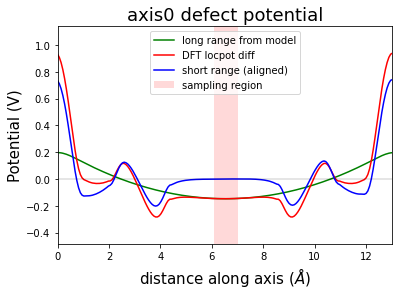

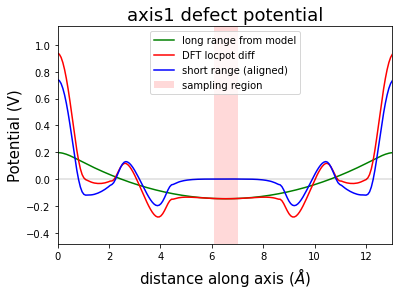

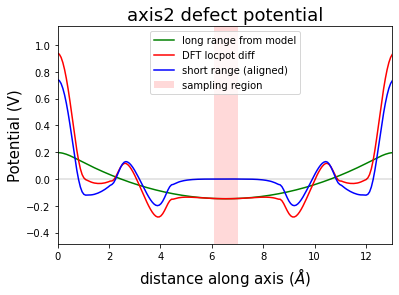

In [6]:
# plot freysoldt potential alignment plot
from doped.pycdt.core.defects_analyzer import freysoldt_correction_from_paths
defect_file_path = "Examples/as_1_Cd_on_te_-2/NUPDOWN_4/"
bulk_file_path = "Examples/Bulk_Supercell/vasp_gam/"
dielectric = 9.13 * np.array([[1., 0, 0], [0., 1., 0], [0, 0, 1.]])
defect_charge = -2

quick_fc = freysoldt_correction_from_paths(defect_file_path, bulk_file_path,
                                           dielectric, defect_charge, plot=True)  # set to True if correction plot printing is desired

# note that you can do the same with kumagai_correction_from_paths (if you have the right OUTCARs)

### Note that we can also create defect complexes
`PyCDT` can't automatically do this, but it's actually relatively simple, depending on what exactly you want to do.
Using the Cd vacancy defect, let's auto-generate all the possible defect complexes of this with another vacancy or a Te interstitial:

In [11]:
vacancies_only['vacancies'][0]['unique_site']  # This is the vacancy site

PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [18]:
cd_vac_structure = vacancies_only['vacancies'][0]['supercell']['structure'].copy(
)
def_complex_structs = ChargedDefectsStructures(
    cd_vac_structure,
    cellmax=cd_vac_structure.num_sites,
    # max_min_oxi for bulk elements only unfortunately
    antisites_flag=False, max_min_oxi=None,
    include_interstitials=True, interstitial_elements=['Te'])

Setting up defects...
Searching for Voronoi interstitial sites (this can take awhile)...

Number of jobs created:
    bulk = 1
    vacancies:
        vac_1_Cd = 5 with site multiplicity 3
        vac_2_Cd = 5 with site multiplicity 3
        vac_3_Cd = 5 with site multiplicity 1
        vac_4_Cd = 5 with site multiplicity 12
        vac_5_Cd = 5 with site multiplicity 12
        vac_6_Te = 5 with site multiplicity 12
        vac_7_Te = 5 with site multiplicity 4
        vac_8_Te = 5 with site multiplicity 12
        vac_9_Te = 5 with site multiplicity 4
    substitutions:
    interstitials:
        Int_Te_1 = 9 with site multiplicity 12
        Int_Te_2 = 9 with site multiplicity 24
        Int_Te_3 = 9 with site multiplicity 24
        Int_Te_4 = 9 with site multiplicity 6
        Int_Te_5 = 9 with site multiplicity 12
        Int_Te_6 = 9 with site multiplicity 4
        Int_Te_7 = 9 with site multiplicity 12
        Int_Te_8 = 9 with site multiplicity 12
        Int_Te_9 = 9 with si

In [19]:
# Let's rename the defects so we know that they're complexes: (and print the defect separation)
for i in def_complex_structs.defects['interstitials']:
    i['V_Cd - Interstitial Distance (Angstrom)'] = i['unique_site'].distance(
        vacancies_only['vacancies'][0]['unique_site'])
    i['name'] = 'V_Cd-' + i['name']
sorted_def_complexes = sorted(
    def_complex_structs.defects['interstitials'], key=lambda defect: defect['V_Cd - Interstitial Distance (Angstrom)'])

In [22]:
for i in sorted_def_complexes:
    print(i['name'])
    print(i['bulk_supercell_site'].frac_coords, i['site_specie'])
    print("V_Cd - Interstitial Distance (Angstrom):",
          f"{i['V_Cd - Interstitial Distance (Angstrom)']:.3f}", '\n')

V_Cd-Int_Te_20
[0. 0. 1.] Te
V_Cd - Interstitial Distance (Angstrom): 0.000 

V_Cd-Int_Te_6
[0.10416667 0.89583333 0.89583333] Te
V_Cd - Interstitial Distance (Angstrom): 2.361 

V_Cd-Int_Te_7
[0.0625 0.8125 0.9375] Te
V_Cd - Interstitial Distance (Angstrom): 2.713 

V_Cd-Int_Te_4
[0.75 1.   0.  ] Te
V_Cd - Interstitial Distance (Angstrom): 3.272 

V_Cd-Int_Te_5
[0.6875 0.9375 0.9375] Te
V_Cd - Interstitial Distance (Angstrom): 4.250 

V_Cd-Int_Te_10
[0.1875 0.8125 0.8125] Te
V_Cd - Interstitial Distance (Angstrom): 4.250 

V_Cd-Int_Te_9
[0.6875 0.1875 0.1875] Te
V_Cd - Interstitial Distance (Angstrom): 5.363 

V_Cd-Int_Te_8
[0.625 0.125 0.125] Te
V_Cd - Interstitial Distance (Angstrom): 5.425 

V_Cd-Int_Te_11
[0.25 0.75 0.75] Te
V_Cd - Interstitial Distance (Angstrom): 5.667 

V_Cd-Int_Te_19
[0.75 0.25 0.25] Te
V_Cd - Interstitial Distance (Angstrom): 5.667 

V_Cd-Int_Te_13
[0.8125 0.3125 0.6875] Te
V_Cd - Interstitial Distance (Angstrom): 6.283 

V_Cd-Int_Te_2
[0.0625 0.1875 0.5625] 

Choosing which defect complexes you want to investigate, you can then use `vasp_input.prepare_vasp_defect_inputs`, `vasp_input.prepare_vasp_defect_dict`, ` vasp_input.vasp_gam_files` etc. again.
Just one thing to note if/when calculating corrections on defect complexes:

We've also added `actual_bulk` optional argument to `SingleDefectParser.get_bulk_gap_data()`, in case we're
looking at defect complexes (so the `SingleDefectParser` 'bulk' is actually the original point defect,
with the wrong pmg-computed gap) - provide the path to the actual perfect bulk CdTe, with the correct band gap
`sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path="Examples/Bulk_Supercell/")`

## Chemical Potentials   
Using the example of $Cs_3Bi_2Br_9$ in this case:

In [11]:
from doped.pycdt.core.chemical_potentials import UserChemPotInputGenerator
#from doped.vasp_input import is_metal
# Note that we've modified setup_phase_diagram_calculations in UserChemPotInputGenerator to also
# print EaH (energy above hull) in name, not print MPID in name, give a dictionary of dictionaries
# (rather than a dictionary of structures etc.)
# Added write_files option to (not) write POSCAR files and folders (better to just generate structures and
# write files ourselves with vasp_converge_files etc)

# If you are writing the files (to the PhaseDiagram folder), I've added the overwrite option
# to (over)write files even if the PhaseDiagram folder already exists
from pymatgen.core.composition import Composition
cpa = UserChemPotInputGenerator(Composition({'Cs': 3, 'Bi': 2, 'Br': 9}))
cs3bi2br9_chempot_calcs = cpa.setup_phase_diagram_calculations(energy_above_hull=0.07, full_phase_diagram=False,
                                                     write_files=False, overwrite=True,
                                                     include_elements=True)
# This creates the structures needed for chemical potential calculations, with 0.07 eV of the (MP-calculated)
# energy above hull.
# I've added the include_elements option, so that we can use full_phase_diagram=False to only include
# necessary chemical potential calculations (i.e. facets adjacent to the composition of interest in the
# GGA phase diagram), and include_elements=True to include necessary elemental reference energy calculations

Returning chempot structures, but not making POSCAR files.


In [12]:
for i in cs3bi2br9_chempot_calcs.keys():
    print(i)

Bi_EaH=0.05
Bi_EaH=0.062
Bi_EaH=0.058
Bi_EaH=0
Bi_EaH=0.0495
BiBr3_EaH=0.061
BiBr3_EaH=0
BiBr3_EaH=0.002
Cs3Bi2Br9_EaH=0.0012
Cs3Bi2Br9_EaH=0
Br_EaH=0
CsBr_EaH=0
CsBr_EaH=0.04
CsBr3_EaH=0
Cs_EaH=0.037
Cs_EaH=0.039
Cs_EaH=0.042
Cs_EaH=0.046
Cs_EaH=0.041
Cs_EaH=0.035
Cs_EaH=0.04
Cs_EaH=0.055
Cs_EaH=0
Cs_EaH=0.054
Cs_EaH=0.047
Cs_EaH=0.065
Cs_EaH=0.026
Cs_EaH=0.0387


**Single-Shot GGA DFT `vasp_std` Convergence Tests**   
Even if we're actually going to calculate the chemical potentials with hybrid DFT, we can use the convergence behaviour of standard GGA DFT to efficiently determine converged calculation parameters. Recommended to use [vaspup2.0](https://github.com/kavanase/vaspup2.0) - here we'll generate the `input` files:

In [4]:
CONFIG = f"""# vaspup2.0 - Seán Kavanagh (sean.kavanagh.19@ucl.ac.uk), 2020
# This is the default config for automating convergence.
# Works for ground-state energy convergence and DFPT convergence.
# Make sure to rename to CONFIG before running.

conv_encut="0"          # No ENCUT convergence testing for chemical potential calcs 
# Use same ENCUT as for defect calculations

conv_kpoint="1"         # 1 for ON, 0 for OFF (KPOINTS Convergence Testing)
kpoints='' # Make with 'kgs_gen_kpts 10 30' (or higher real space cutoff if needs be)

run_vasp="1" # Run VASP after generating the files with 'generate-converge'"""

In [5]:
vasp_input.vasp_converge_files?

Signature:
vasp_input.vasp_converge_files(
    structure: 'pymatgen.core.Structure',
    input_dir: str = None,
    incar_settings: dict = None,
    config: str = None,
) -> None
Docstring:
Generates input files for single-shot GGA convergence test calculations.
Automatically sets ISMEAR (in INCAR) to 2 (if metallic) or 0 if not.
Recommended to use with vaspup2.0
Args:
    structure (Structure object):
        Structure to create input files for.
    input_dir (str):
        Folder in which to create 'input' folder with VASP input files.
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs or doped.vasp_input
        source code, to see what the default INCAR settings are.
        (default: None)
    config (str):
        CONFIG file string. If provided, will also write the CONFIG file (to automate
        convergence tests with vaspup2.0) to each

**Note:** In order to use this function to generate the input `POTCAR` files for the `VASP` calculations, you need to have your pseudopotential directory (`PSP_VASP_DIR`) set in your `.pmgrc.yaml` file (see https://pymatgen.org/usage.html#setting-the-pmg-mapi-key-in-the-config-file).

In [6]:
from doped import vasp_input
for key, val in cs3bi2br9_chempot_calcs.items():
    vasp_input.vasp_converge_files(
        val['Structure'], input_dir='PhaseDiagram/'+key)

Have a look at the auto-generated files in the `PhaseDiagram` folder!

In [26]:
for key, val in cs3bi2br9_chempot_calcs.items():
    vasp_input.vasp_converge_files(
        val['Structure'], input_dir='PhaseDiagram/'+key, config=CONFIG)
# Use this if you also want to write the CONFIG files to each 'input' directory, ready to go with vaspup2.0

After generating the input files like this, can then use [vaspup2.0](https://github.com/kavanase/vaspup2.0) (via the `input/CONFIG` file) to set the range of `ENCUT` and `KPOINTS` you want to check for convergence. Alternatively, you can use these input files to manually run convergence tests.

### `vasp_std` Chemical Potential Relaxations
Once the converged **_k_**-points for each competing phase have been determined, using [vaspup2.0](https://github.com/kavanase/vaspup2.0) or manually, you then need to perform geometry relaxations and a final single-shot energy calculation for each competing phase, with the same `ENCUT` as your bulk/defect calculations and the individually-determined **_k_**-points. These calculations can then automatically be parsed using the `vasprun.xml(.gz)` files, as shown in `doped_chempot_parsing_example.ipynb`, to yield the region of chemical stability and chemical potential limits, which can be fed to the formation energy plot and table functions, to generate your transition level diagrams etc. 